<img src='../sys/Title.png'>


<p style="text-align: right;"><font face="Microsoft JhengHei"> 精算二部 決策支援系統科 黃喬敬 #2606</font> </p><br>







<p style="text-align: center;"> <font size=100% face="Microsoft JhengHei">Classification 分類    </font>  </p>






<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="INPUT"></a>

此版本尚在測試實驗，如有異常請回報，謝謝

------

# 輸入資料



## <font color=DARKRED>設定輸入資料、目標欄位</font>



1.  
    ```python
    TrainDataFile = 'Train'
 ```
    引號中的 **Train**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTrain 為例，修改如下
    ```python
    TrainDataFile = 'ClaimRiskTrain'
    ```
    
2. 
    ```python
    TestDataFile = 'Test'
    ```
    引號中的 **Test**  改成自己上傳的檔案位置及名稱，以 ClaimRiskTest17 為例，修改如下
    ```python
    TestDataFile = 'ClaimRiskTest17'
    ```
3. 
    ```python
    TargetColumn = 'Y'

    ```
    引號中的 **Y**  改成自己上傳的檔案中，要學習預測的目標欄位的名稱，以 ans 為例，修改如下
    ```python
    TargetColumn = 'ans'
    ```
4. 
    ```python
    DropColumns = ''

    ```
    引號中 填入自己上傳的檔案中，不需要學習的欄位名稱，多數欄位以逗號分隔，比如 ID 或是 電話 等等，以 '被保人ID', '理賠指數_2016' 為例，修改如下
    ```python
    DropColumns = '被保人ID', '理賠指數_2016'
    ```
5. 
    ```python
    OutputAnswer = 'finaldata'

    ```
    引號中的 **finaldata**  改成預定產出各模型預測結果的檔名，也可以不必修改

<img src='../sys/NeedExe.png' style="float:left;width:27%;"><img src='../sys/NeedModi.png' style="float:middle;width:27.2%;">


In [1]:
TrainDataFile = 'digits_train.csv'
TestDataFile  = 'digits_test.csv'
TargetColumn  = 'ans'
DropColumns   = ''#'CUST_ID','OCCUPATION_f','OCCUPATION','CITY_CODE','AGE'
OutputAnswer  = 'finaldata'
OtherPredict = ''#'LightGBM', 'RidgeClassifier','SVM','K-NN'
n_splits = 3

## 介面說明

In [2]:
'左方帶有 In [ ]  表示這是程式碼的區塊，在區塊內的程式碼可以執行，游標移至區塊內並按下 Shift + Enter ，即可執行此區塊內的程式'
'In [ ] 的中括號 [ ] 內的數字表示執行順序，在介面開啟之後執行過的變數都會存在 (除非重啟核心或重開介面) ，類似 Script 執行概念'

1 + 2
#a+9   #這行是用來產生錯誤範例用的

3

<img src='../sys/ErrorExample1.png' width="70%" >

* 錯誤訊息範例如上圖所示 <font color=OliveDrab size=4%> ↑ </font> ，請**觀察錯誤訊息原因並修改**後重新執行一次  Shift + Enter 

* 如果是之前的區塊執行造成的錯誤，則之前的區塊 (及過程中相關的區塊) 及錯誤區塊都要重新執行一次  Shift + Enter 


------
### 工具列介面

<img src='../sys/UIExample1.png' width="40%" >

執行介面範例如上圖所示 ， 包含數種功能 <font color=OliveDrab size=4%> ↑ </font> ，請依需求使用
* Interrupt: 中斷目前執行
* Restart & Run All : **全部重新執行**  如果已經執行過一次了，只是修改一點參數或是檔案想全部重跑，可以直接按這個


## 事前教學: 

### <font color=DARKSLATEBLUE>轉為註解 / 取消註解 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>

以下會針對各種資料及特徵進行不同處理，每份資料不一定需要哪種處理法，<font color=MIDNIGHTBLUE> **如果不需要請在指令前加上井字號 # 轉為註解** </font>

**範例 : **
```python
print('我不想要這行')
```
**加上井字號 # 轉為註解，把上面變成下面這樣 : ** 
```python
#print('我不想要這行')
```

**#不管它做了什麼，不需要的#掉就是了**


<font color=DARKSLATEBLUE  size=4%>快捷鍵 : 可以全選(ctrl+a)整個區塊然後(ctrl+/)</font>



------

## 符號說明

<font color=OliveDrab size=4%>◎◎◎ ↓ </font>  : 表示以下的程式原則上**不需更改**，一般而言是資料庫、設定或教學示範

<font color=Orange size=4%  >◎◎◎ ↓</font>  : 表示以下的程式需要**視資料情形更改**，一般而言是特徵選擇，請依需求調整

<font color=CRIMSON size=4%> ◎◎◎ ↓</font>  : 表示以下的程式**必需更改**，改為自己的資料名稱等等

<font  size=4%> ◎◎◎ ↓</font> : 程式功能或說明



## 資料型式   .CSV 檔案格式

### 資料型態 


* 各項特徵值以數值為主，文字會被轉成數值 (比如 male/female 可能會被轉成 0/1 或 1/0) 

* 缺值或文字異常原則上會自動處理，但無法保證不會出錯

### 訓練資料格式
ID(不一定要，使用者自己辨認用)；目標值可以是特徵的其中一個，不一定要列在最後

ID | 特徵名1 | ... | 特徵名m | 目標值
---- | ---
id_1 | x_11 | ... | x_m1 | y_1
.. | .. | ... | .. | ..
id_n | x_1n | ... | x_mn | y_n



### 測試資料格式
ID(不一定要，使用者自己辨認用)；**欄位必需與訓練資料相同，或是欄位剛好少一欄目標值**



ID | 特徵名1 | ... | 特徵名m 
---- | ---
id_1 | x_11 | ... | x_m1
.. | .. | ... | .. 
id_n | x_1n | ... | x_mn 

*如果測試資料也包含目標欄位，可以在預測階段進行對答案計算準確率*  

也可以將其移除以便計算 (假設資料變數叫 TestData)

```python
TestData.drop(['目標值'],axis=1,inplace=True)
```




### 此教學範例說明
將使用 **理賠風險預測** 檔案進行範例實驗


註: 有隨機挖空及改動少數欄位以作為教學特徵處理

#  <font color=RED>程式開始</font> 


## 載入資料庫




<font color="OliveDrab" size="5%">◎◎◎ ↓ </font> : 載入各種資料庫並設定呈現方式等等，原則上這塊不要理他

<img src='../sys/NeedExe.png' style="float:left;width:27%;">


<a id="BEGIN"></a>
<!---<img src='../sys/NeedExe.png' style="float:left;width:27%;">--->

In [3]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.offline    as py
import os, csv, timeit
from sklearn.base          import TransformerMixin
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer,QuantileTransformer
from sklearn.pipeline      import make_pipeline
from sklearn.decomposition import PCA, TruncatedSVD, NMF,MiniBatchSparsePCA,DictionaryLearning,FastICA,FactorAnalysis
from sklearn.manifold      import TSNE
from sklearn.utils         import shuffle
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics               import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report,cohen_kappa_score,hamming_loss,jaccard_similarity_score
#from imblearn.under_sampling       import RandomUnderSampler
from plotly.graph_objs             import *
if not os.path.exists(r'Model'):
    os.makedirs(r'Model') 

pd.set_option('display.max_columns', 500)
%autosave 180 
%matplotlib inline
py.init_notebook_mode(connected=True)

Autosaving every 180 seconds


<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [4]:
os.environ['KERAS_BACKEND'] = 'tensorflow'
os.environ['MLENS_BACKEND'] = 'multiprocessing'
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 144
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")

import xlrd
import unicodecsv

def xls2csv (filename):
    if filename.split('.')[-1] in ( 'csv' , 'txt'):
        return filename
    elif filename.split('.')[-1] not in ('xls', 'xlsx'):
        if os.path.exists(filename + '.csv'):
            return filename + '.csv'
        elif os.path.exists(filename + '.xls') :
            filenamexls = filename + '.xls'
        elif os.path.exists(filename + '.xlsx'):
            filenamexls = filename + '.xlsx'
    else:
        filenamexls = filename

    wb = xlrd.open_workbook(filenamexls, encoding_override="cp950")
    sh = wb.sheet_by_index(0)

    filenamecsv = filenamexls.replace('xlsx','csv').replace('xls','csv')
    with open(filename + '.csv',"wb") as fh:
        csv_out = unicodecsv.writer(fh, encoding = 'utf-8')
        for row_number in range(sh.nrows):
            print(sh.row_values(row_number))
            force_decode(sh.row_values(row_number))
            csv_out.writerow(sh.row_values(row_number))
    fh.close()
    return filenamecsv

TrainDataFileCSV = xls2csv(TrainDataFile)
TestDataFileCSV = xls2csv(TestDataFile)
OutputAnswerCSV = OutputAnswer + '.csv'
Output_train_prob = 'Output_train_prob.csv'
Output_test_prob = 'Output_test_prob.csv'
Output_train_Pred = 'Output_train_Pred.csv'
Output_test_Pred = 'Output_test_Pred.csv'

###  <font color=DARKBLUE>決定隨機種子 及 平行化分工數目</font>
<font color=OliveDrab size=5%>◎◎◎ ↓</font>為了實驗的可再現性，通常會固定種子，原則上這塊就隨便訂一個固定值；平行化數目預設為核心數-2

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [5]:
Random_State = 411

import multiprocessing
n_jobs = multiprocessing.cpu_count() - 2



## <font color=DARKRED>讀取檔案 載入資料</font>
◎◎◎ 讀取檔案、印出前五行觀察 ◎◎◎
<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例，如需使用請將檔案上傳至同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

<font color=CRIMSON size=3%>為節省系統空間，前次執行的預測結果與預測模型會直接刪除或覆蓋，請自行保留 Model 資料夾下的檔案 </font>  

In [6]:
def mixtoutf(name):
    with open(name,'r', errors='ignore') as in_file:
        stripped = (line.strip() for line in in_file)
        lines = (line.split(",") for line in stripped if line)
        with open('temp', 'w', encoding='utf-8') as out_file:
            writer = csv.writer(out_file)
            writer.writerows(lines)
        return pd.read_csv('temp')
try:
    TrainData = pd.read_csv(TrainDataFileCSV)
except UnicodeDecodeError:
    try: 
        TrainData = pd.read_csv(TrainDataFileCSV, encoding = 'big5')
    except:
        TrainData = mixtoutf(TrainDataFileCSV)
try:
    TestData = pd.read_csv(TestDataFileCSV)
except UnicodeDecodeError:
    try:
        TestData = pd.read_csv(TestDataFileCSV, encoding = 'big5')
    except:
        TrainData = mixtoutf(TrainDataFileCSV)

for file in [Output_train_prob, Output_test_prob, Output_train_Pred, Output_test_Pred, OutputAnswerCSV] :  
    try:
        os.remove(file)
    except OSError:
        pass


temp = pd.concat([TrainData,TestData],axis=0,sort=False)
NoClasses = temp[TargetColumn].nunique()
for col in temp.columns.values:
    if temp[col].isnull().all():
        temp.drop([col],axis=1,inplace=True)
        display(col,'整欄皆為空值，直接刪除')
TrainData = temp[:TrainData.shape[0]].reset_index(drop=True)
TestData = temp[TrainData.shape[0]:].reset_index(drop=True)
if TrainData[TargetColumn].isnull().any():
    display(TrainData[TrainData[TargetColumn].isnull()])
    TrainData.dropna(subset = [TargetColumn],inplace =True)
    display('上述訓練資料的目標包含缺失值，將其資料視為缺損，捨棄該筆資料')
print()
print('類別數目：',NoClasses)

'觀察一下前五列資料'
display(TrainData.head(5))
display(TestData.head(5))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
0,0.0,0.0,2.0,14.0,14.0,6.0,0.0,0.0,0.0,0.0,10.0,15.0,11.0,15.0,2.0,0.0,0.0,3.0,16.0,3.0,0.0,12.0,6.0,0.0,0.0,3.0,9.0,0.0,0.0,9.0,10.0,0.0,0.0,10.0,11.0,0.0,0.0,8.0,12.0,0.0,0.0,7.0,16.0,1.0,0.0,11.0,13.0,0.0,0.0,0.0,15.0,14.0,12.0,15.0,10.0,0.0,0.0,0.0,3.0,14.0,16.0,13.0,5.0,0.0,NaN


'訓練資料的目標包含缺失值，將其資料視為缺損，捨棄該筆資料'


類別數目： 10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
1,0.0,0.0,4.0,13.0,14.0,16.0,3.0,0.0,0.0,0.0,6.0,11.0,10.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,16.0,12.0,0.0,0.0,0.0,15.0,13.0,16.0,7.0,2.0,0.0,0.0,0.0,0.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,0.0,7.0
2,0.0,2.0,10.0,16.0,12.0,0.0,0.0,0.0,0.0,12.0,14.0,12.0,16.0,5.0,0.0,0.0,0.0,2.0,0.0,4.0,16.0,7.0,1.0,0.0,0.0,0.0,4.0,15.0,16.0,16.0,10.0,0.0,0.0,1.0,16.0,16.0,12.0,5.0,2.0,0.0,0.0,0.0,15.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0.0,7.0
3,0.0,0.0,2.0,11.0,13.0,4.0,0.0,0.0,0.0,1.0,13.0,7.0,8.0,15.0,0.0,0.0,0.0,6.0,11.0,0.0,5.0,13.0,0.0,0.0,0.0,9.0,7.0,2.0,14.0,14.0,0.0,0.0,0.0,3.0,14.0,15.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,0.0,11.0,7.0,0.0,10.0,7.0,0.0,0.0,0.0,4.0,10.0,15.0,15.0,3.0,0.0,9.0
4,0.0,0.0,8.0,16.0,14.0,15.0,0.0,0.0,0.0,0.0,13.0,11.0,15.0,11.0,0.0,0.0,0.0,4.0,14.0,1.0,13.0,5.0,0.0,0.0,0.0,3.0,7.0,8.0,16.0,4.0,3.0,0.0,0.0,0.0,14.0,16.0,16.0,13.0,7.0,0.0,0.0,0.0,5.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,6.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,6.0,0.0,0.0,0.0,0.0,7.0
5,0.0,0.0,0.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,5.0,0.0,0.0,0.0,0.0,2.0,16.0,16.0,14.0,8.0,1.0,0.0,0.0,4.0,16.0,16.0,6.0,16.0,9.0,0.0,0.0,0.0,8.0,16.0,11.0,16.0,10.0,0.0,0.0,0.0,1.0,14.0,16.0,13.0,1.0,0.0,6.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
1,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
2,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6.0
3,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8.0


## <font color=DARKRED>設定目標</font>
<!--

可以直接指定目標欄位，比如目標類別是"Y"，就設定為 TargetY = 'Y' 

```python
TargetY = 'Y'
```
引號中的 **Y**  改成自己上傳的檔案中，要預測的目標欄位名稱


-----

也可以用條件式設定並建立目標，比如資料中想以 *理賠指數_2016* 是否為零作為目標

```python                      
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y']  = (TestData['理賠指數_2016']>0).astype('int')
```

```python
TrainData['Y'] = (TrainData['理賠指數_2016']>0).astype('int')
TestData['Y'] = (TestData['理賠指數_2016']>0).astype('int')
```
一樣要設定 TargetY = 'Y'，用於之後的判別目標

-->

-----


CSV檔案中，如果中文出現亂碼請使用UTF-8編碼；



◎◎◎ 檔案資訊中每欄的格式如果是 **object** ，代表資料欄位中有非數值的文字或異常

<font color = Brown , size=2%> 預測類別目標設定</font>

<font color=CRIMSON size=5%>◎◎◎ ↓ </font>  以下為範例展示，如需使用請將檔案放在同資料夾並更改檔名讀取

<img src='../sys/NeedExe.png'  width="20%">

In [7]:
'可以直接指定目標欄位'
TargetY = TargetColumn

'簡單檢閱資料資訊'
display(TrainData.info())
TestData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 897 entries, 1 to 897
Data columns (total 65 columns):
0      897 non-null float64
1      897 non-null float64
2      897 non-null float64
3      897 non-null float64
4      897 non-null float64
5      897 non-null float64
6      897 non-null float64
7      897 non-null float64
8      897 non-null float64
9      897 non-null float64
10     897 non-null float64
11     897 non-null float64
12     897 non-null float64
13     897 non-null float64
14     897 non-null float64
15     897 non-null float64
16     897 non-null float64
17     897 non-null float64
18     897 non-null float64
19     897 non-null float64
20     897 non-null float64
21     897 non-null float64
22     897 non-null float64
23     897 non-null float64
24     897 non-null float64
25     897 non-null float64
26     897 non-null float64
27     897 non-null float64
28     897 non-null float64
29     897 non-null float64
30     897 non-null float64
31     897 non-null float64

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 65 columns):
0      899 non-null float64
1      899 non-null float64
2      899 non-null float64
3      899 non-null float64
4      899 non-null float64
5      899 non-null float64
6      899 non-null float64
7      899 non-null float64
8      899 non-null float64
9      899 non-null float64
10     899 non-null float64
11     899 non-null float64
12     899 non-null float64
13     899 non-null float64
14     899 non-null float64
15     899 non-null float64
16     899 non-null float64
17     899 non-null float64
18     899 non-null float64
19     899 non-null float64
20     899 non-null float64
21     899 non-null float64
22     899 non-null float64
23     899 non-null float64
24     899 non-null float64
25     899 non-null float64
26     899 non-null float64
27     899 non-null float64
28     899 non-null float64
29     899 non-null float64
30     899 non-null float64
31     899 non-null float64

- - - 
↑ 上方資料資訊中，如果 **dtypes: ** .... 最後有 **object(1)**，代表資料中有 **1** 個欄位是非數字 (2就是2欄是非數字)
- - - 
* 通常資料中會包含部份識別欄位，比如 ID 

* 這些欄位可以暫時移除，以供測試，程式碼範例如下，移除 **理賠指數_2016** 與 **被保人ID** 欄位，可自行修改欲刪除欄位。

```python
TrainData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
TestData.drop(['理賠指數_2016','被保人ID'],axis=1,inplace=True, errors='ignore')
```

<font color=Orange size=5%  >◎◎◎ ↓</font> 移除特定欄位，將不影響計算的欄位移除

<img src='../sys/NeedExe.png'  width="20%">

In [8]:
OtherPredict = [OtherPredict] if type(OtherPredict) is str else list(OtherPredict) if type(OtherPredict) is not list else OtherPredict
OtherPredict.remove('') if '' in OtherPredict else None
if len(OtherPredict)  >0:
    TrainData.filter(OtherPredict,axis=1).to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
    TestData.filter(OtherPredict,axis=1).to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')


'移除不必要欄位，可能是 ID 或是轉換 TargetY 之前的原值，如果沒有就留空 即可'
DropColumns = [DropColumns] if type(DropColumns) is str else list(DropColumns) if type(DropColumns) is not list else DropColumns
DropColumns.remove('') if '' in DropColumns else None
DropColumns += OtherPredict
TrainData.drop(DropColumns,axis = 1,inplace = True, errors = 'ignore')
TestData.drop (DropColumns,axis = 1,inplace = True, errors = 'ignore')


print()
'印出訓練資料及測試資料的筆數與欄位數'
print('訓練資料筆數：', TrainData.shape[0], '   訓練資料欄位數：',TrainData.shape[1])
print('測試資料筆數：', TestData.shape[0] , '   測試資料欄位數：',TestData.shape[1])

temp = set(TrainData.columns.values) - set(TestData.columns.values) 
if not ((temp == set(TargetY) ) or (temp ==  set())):
    print('Train 與 Test 資料欄位不合，請確認欄位:' ,temp)
print()    
print('欄位名稱:')

#display(pd.DataFrame(TrainData.columns.values.reshape(min(20,TrainData.columns.shape[0]),-1)))
display(pd.DataFrame(TrainData.columns.values))



訓練資料筆數： 897    訓練資料欄位數： 65
測試資料筆數： 899    測試資料欄位數： 65

欄位名稱:


,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9





<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="PREPROCESS"></a>

# 特徵處理

異常欄位值、缺失值簡易處理

------
## <font color=DARKBLUE>非數值特徵轉為數值</font>

如果不需要請在指令前加上井字號 # 轉為註解 

風險是如果資料有異常字元，會被硬轉成數字，請自行確認資料 

◎◎◎ 建立類別轉換器、列出非數字欄位名稱、將非數字欄位轉為數字 ◎◎◎

<font color=Orange size=5%>◎◎◎ ↓ </font> 以下是將欄位中，不是數字類別的資料欄視為字串類別，並轉為數字。

<font color=CRIMSON>若有binary feature 請先使用下方 to_bin_feature=[] ，<font color=DARKCYAN>**[]** </font> 中填入上方觀察到的有缺失值的欄位名稱之binary feature</font>

<!--
```python 
*未使用
to_bin_feature=[]
*使用中
to_bin_feature=['gender','if_own_car']
```
-->

不強迫使用

<font color=CRIMSON>nan_as_category如果True認為空值是值，如果False不認為空值是值，視情況使用</font>

```python
nan_as_category = False
```

In [9]:
display(TestData.head(5))
def one_hot_encoder(train,test, label_factors = [], nan_as_category = False):
    df = pd.concat([train,test]).drop([TargetColumn],axis=1).reset_index(drop=True)
    
    for col in label_factors:
        labels, uniques = pd.factorize(df[col],sort =True)
        df[col] = labels + 1
        [print(uniques.get_loc(unque)+1 ,' <--- ',unque)  for unque in uniques]
    for col in (col for col in df.columns.values if df[col].dtype == 'object') :
        df[col] = df[col].astype('str')
    noencoding_cols = [col for col in df.columns if df[col].dtype != 'object']
    categorical_cols_b = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 2]
    categorical_cols_ = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]
    
    print('\n以下欄位將轉換為數值:')
    display(pd.DataFrame(categorical_cols_+categorical_cols_b))
    df = pd.get_dummies(df, columns = categorical_cols_b, dummy_na = nan_as_category,drop_first=True)
    df = pd.get_dummies(df, columns = categorical_cols_, dummy_na = nan_as_category)
    df.loc[df.index[:train.shape[0]],TargetColumn] = train[TargetColumn].values
    df.loc[df.index[train.shape[0]:],TargetColumn]  = np.nan if TargetColumn not in test.columns.values else test[TargetColumn].values
    if df[TargetColumn].dtype == 'object':
        print('\n目標欄位 ',TargetColumn,' 將轉換為數值:', )
        labels, uniques = pd.factorize(df[TargetColumn],sort =True,na_sentinel =-1e9)
        df[TargetColumn] = [np.nan if x==-1e9 else x for x in labels]
        [print(uniques.get_loc(unque) ,' <--- ',unque)  for unque in uniques]
    print('\n以下為新增欄位:')
    display(pd.DataFrame([col for col in df.columns.values if col not in train.columns.values]))

    #temp.reshape(5,-1)
    #display(pd.DataFrame(np.asarray([col for col in df.columns.values if col not in train.columns.values]).reshape(min(20,TrainData.columns.shape[0]),-1)))
    return df[:train.shape[0]].reset_index(drop=True),df[train.shape[0]:].reset_index(drop=True),[col for col in df.columns.values if col not in train.columns.values]

TrainData_Na,TestData_Na,xxxxx = one_hot_encoder(TrainData,TestData)

display(TestData_Na.head(5))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
1,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
2,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6.0
3,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8.0



以下欄位將轉換為數值:


""



以下為新增欄位:


""


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,ans
0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
1,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
2,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,5.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,13.0,16.0,3.0,0.0,0.0,0.0,0.0,0.0,14.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,12.0,7.0,2.0,0.0,0.0,0.0,0.0,13.0,16.0,13.0,16.0,3.0,0.0,0.0,0.0,7.0,16.0,11.0,15.0,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6.0
3,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,7.0,7.0,4.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,1.0,0.0,0.0,4.0,8.0,8.0,15.0,15.0,6.0,0.0,0.0,2.0,11.0,15.0,15.0,4.0,0.0,0.0,0.0,0.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0,0.0,9.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7.0
4,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,12.0,14.0,14.0,12.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,15.0,4.0,0.0,0.0,0.0,3.0,16.0,12.0,14.0,2.0,0.0,0.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,3.0,16.0,8.0,10.0,13.0,2.0,0.0,0.0,1.0,15.0,1.0,3.0,16.0,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8.0


------
## <font color=DARKBLUE>填補缺失值</font>

◎◎◎ 先檢閱缺失值，指令可以看出哪些欄有缺失值，依缺失值多寡列出  (欄位太多則只顯示前10)

◎◎◎ 如果印出值全都有 >0 代表可能有 20欄以上的欄位有缺失值，可修改 (10) 為更多，比如 (50) 以供觀察

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   檢閱缺失值並列出

In [10]:
TrainData.isnull().sum().sort_values(ascending = False).head(10)

ans    0
31     0
29     0
28     0
27     0
26     0
25     0
24     0
23     0
22     0
dtype: int64

### <font color=DARKBLUE>逐欄填補缺失值</font>
#### 填值



<font color=CRIMSON>請將下方兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
```
比如改為
```python
TrainData['缺值'].fillna(TrainData['缺值'].mode(),inplace=True)
```

或是改為如下，則全部填 -999 
```python
TrainData['缺值'].fillna( -999 ,inplace=True)
```

* mode() 眾數 
* mean() 平均數

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，使用該欄位的眾數填值

In [11]:
# TrainData['feature'].fillna(TrainData['feature'].mode(),inplace=True)
# TestData['feature'].fillna(TestData['feature'].mode(),inplace=True)

#### 分有無

<font color=CRIMSON>請將下方程式的兩處 ['feature'] 中的 <font color=DARKCYAN>**feature** </font> 改成上方觀察到的有缺失值的欄位名稱</font> 
```python
TrainData.loc[TrainData.feature.notnull(),'feature'] = 1
```
比如改為
```python
TrainData.loc[TrainData.feature.notnull(),'feature'] = 1
```

**如果需要使用請移除指令前的井字號 #**

<font color=Orange size=5%>◎◎◎ ↓ </font>  逐欄填值方法之一，直接將該欄分成有值(1)跟缺值(0)

In [12]:
# TrainData.loc[TrainData.feature.notnull(),'feature']=1
# TrainData.loc[TrainData.feature.isnull(),'feature']=0

# TestData.loc[TestData.feature.notnull(),'feature']=1
# TestData.loc[TestData.feature.isnull(),'feature']=0

------
### <font color=DARKBLUE>全面填補缺失值</font>

◎◎◎<font  color=red >**下列兩方法請擇一進行**</font>

嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值

如果不需要請在指令前加上井字號 # 轉為註解 


#### <font color=DARKBLUE>全部填值</font>
把所有空值全部填入設定值, 請將 -1 數值修改

```python
TrainData.fillna(-1, inplace=True)
```

改為想要的填入值，例如 -999

```python
TrainData.fillna(-999, inplace=True)
```
**如果需要使用請移除指令前的井字號 #**
<font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入指定數值

In [13]:
# TrainData.fillna(-1, inplace=True)

# TestData.fillna(-1, inplace=True)

#### <font color=DARKBLUE>全部取眾數</font>
<font color=Orange  >◎◎◎ ↓</font>  : 建立填值類別方法，直接把所有資料缺值填入該欄位的眾數，填完之後再次印出缺失值檢閱確認
<br>    
 此處是直接全部填進眾數 <font color=blue  >.mode()[0]</font>，可以修改為 **.mean() 平均值** 或 **.min() 最小值** 等等。
 (原先是非數字轉數字的欄位仍會使用眾數)
 
 嚴格來說，進行資料分析時應針對各項缺值使用不同方法填值
 
 **如果不需使用請在指令前加上井字號 #**
 
 <font color=Orange size=5%>◎◎◎ ↓</font>  將資料空欄全部填入眾數，包含原先是字串的欄位

In [14]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with mode of column.
        """
    def fit(self, X, y = None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mode()[0] for c in X ],index = X.columns)
        
        return self
    def transform(self, X, y = None):
        return X.fillna(self.fill)
  
temp = pd.concat([TrainData,TestData],axis=0,sort=False)
temp = DataFrameImputer().fit_transform(temp)
#temp = temp.fillna(0)
TestY = TestData[TargetColumn] if  (TargetColumn in TestData.columns.values) else None
TrainData = temp[:TrainData.shape[0]].reset_index(drop=True)
TestData = temp[TrainData.shape[0]:].reset_index(drop=True)  
TestData[TargetColumn] = TestY if TestY is not None else np.nan
del temp,TestY
Train_co2 = TrainData.copy()
Test_co2 = TestData.copy()

TrainData_for_SCAL,TestData_for_SCAL,xxxxx = one_hot_encoder(TrainData,TestData)

# if TargetColumn not in Test_co2.columns.values:
#     Test_co2[TargetColumn]=np.nan
#     concat_light_temp2 = pd.concat([Train_co2 ,Test_co2 ],axis=0,ignore_index=True)
#     temp_thing=feature_encoder(concat_light_temp2,to_bin_feature,nan_as_category)
#     TrainData_for_SCAL = temp_thing[:Train_co2.shape[0]]
#     TestData_for_SCAL =temp_thing.loc[Train_co2.shape[0]:]
#     TestData_for_SCAL=TestData_for_SCAL.drop([TargetColumn],axis=1)
# else:
#     concat_light_temp2 = pd.concat([Train_co2 ,Test_co2],axis=0,ignore_index=True)
#     temp_thing=feature_encoder(concat_light_temp2,to_bin_feature,nan_as_category)
#     TrainData_for_SCAL = temp_thing[:Train_co2.shape[0]]
#     TestData_for_SCAL =temp_thing.loc[Train_co2.shape[0]:]

# TrainData_for_SCAL = feature_encoder(Train_co2,to_bin_feature,nan_as_category)
# TestData_for_SCAL = feature_encoder(Test_co2,to_bin_feature,nan_as_category)


以下欄位將轉換為數值:


""



以下為新增欄位:


""


## 特徵轉換

有時候某些特徵經過轉換之後表現較佳，金額或許是其中一個可能的例子，以下範例為將 '收入NTD' 轉換為其 log10 值 

**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是轉換特徵

In [15]:
# TrainData_for_SCAL.loc[TrainData_for_SCAL['收入_NTD']>0,'收入_NTD'] = np.log10(TrainData_for_SCAL.loc[TrainData_for_SCAL['收入_NTD']>0,'收入_NTD'])
# TestData_for_SCAL.loc[TestData_for_SCAL['收入_NTD']>0,'收入_NTD'] = np.log10(TestData_for_SCAL.loc[TestData_for_SCAL['收入_NTD']>0,'收入_NTD'])

------
## <font color=DARKBLUE>粹取特徵</font>

* 粹取特徵應依資料不同而定，以下舉例是以逐年理賠金額粹取特徵

* 可在觀察資料之後自行粹取重要特徵

程式說明:

* 針對特徵名稱包含 '指數_' 的欄位粹取特徵
```python
X_features = Kernel_Scaler.fit_transform(TrainData.drop([TargetY],axis=1).filter(s for s in TrainData.drop([TargetY],axis=1).columns.values if '指數_' in s))
```

* 建立新特徵，依序為 '指數RBF\__1' , '指數RBF\__2' ....
```python
for i in range(X_features.shape[1]):
    TrainData['指數RBF__'+ str(i+1)] = X_features[:,i]
```

<font color = Brown , size=2%> **注意**  : 對 Training Data 所做的各種處理，也要對 Testing Data 做一樣的處理</font>


**如果需要使用請移除指令前的井字號 #**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>    以下範例是以 PCA 及 RBF Kernel ，針對各年指數，各粹取特徵 10 個特徵 (非指數部份亦分開粹取 RBF )

In [16]:
# from sklearn.kernel_approximation import RBFSampler
# Scaler = QuantileTransformer()
# rbf_feature = RBFSampler(gamma=0.1, random_state=Random_State, n_components=10)
# Kernel_Scaler = make_pipeline(Scaler, rbf_feature)

# X_features = Kernel_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數RBF__'+ str(i+1)] = X_features[:,i]

    

# X_features = Kernel_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TrainData['RBF__'+ str(i+1)] = X_features[:,i]

# X_features = Kernel_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' not in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['RBF__'+ str(i+1)] = X_features[:,i]


# reducedPCA = PCA(n_components=10)
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedPCA)

# X_features = reduced_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數pca_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數pca_'+ str(i+1)] = X_features[:,i]
    
    
    
# reducedICA = FastICA(n_components=10)
# reduced_Scaler = make_pipeline(Scaler, reducedICA)

# X_features = reduced_Scaler.fit_transform(TrainData_for_SCAL.drop([TargetY],axis=1).filter(s for s in  TrainData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TrainData_for_SCAL['指數ICA_'+ str(i+1)] = X_features[:,i]

# X_features = reduced_Scaler.fit_transform(TestData_for_SCAL.drop([TargetY],axis=1).filter(s for s in TestData_for_SCAL.drop([TargetY],axis=1).columns.values if '指數_' in s))
# for i in range(X_features.shape[1]):
#     TestData_for_SCAL['指數ICA_'+ str(i+1)] = X_features[:,i]
    


# TrainData_for_SCAL.drop([s for s in TrainData_for_SCAL.columns.values if '指數_2' in s],axis=1,inplace=True)
# TestData_for_SCAL.drop([s for s in TestData_for_SCAL.columns.values if '指數_2' in s],axis=1,inplace=True)

# # print(TrainData_for_SCAL.columns.values)


<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<a id="OBSERVATION"></a>

------
# <font color=DARKBLUE>觀察資料</font>
觀察資料是很重要的一步，以下為基本幾種檢視方式
<br>
<font color=MIDNIGHTBLUE>! 如果不需要請在指令前加上井字號 # 轉為註解 !</font>



## <font color=DARKBLUE>觀察各特徵散佈區間</font> 要



請將下方程式中的中欄位名稱修改

```python
sns.boxplot(data=TrainData.iloc[:,5:35]);
```

<font color=blue >**5**</font> 與 <font color=blue >**35**</font> 改為自定欄位編號，意思是觀察欄位區間從前者看到後者，也可以使用欄位名稱，比如 

```python
sns.boxplot(data=TrainData.loc[:,'BMI':'被保人性別']);
```

-----



此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

<font color=Orange size=5%>◎◎◎ ↓</font>  印出各欄位名稱，再畫出特定欄位區間的特徵散佈

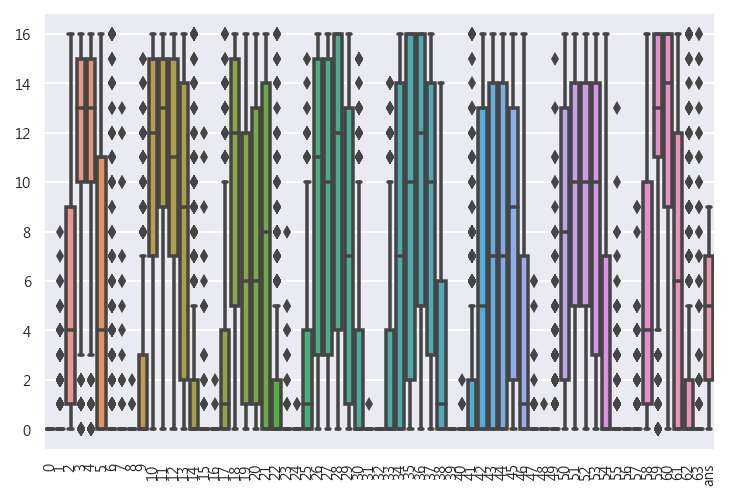

In [17]:
plot = sns.boxplot(data=TrainData_for_SCAL);
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

 ### <font color=DARKBLUE>移除部份欄位</font>
 
 移除影響分佈觀察的欄位再觀察一次，這個流程可能會重複數次以觀察各欄位分佈情形
 
<font color=Orange size=5%>◎◎◎ ↓</font>  選擇影響分佈觀察的欄位， 請將 **drop(['B5到達年齡'])** 中的欄位名改為自定欄位名

In [18]:
# '''移除較不同的分佈以觀察其它特徵'''
# plot = sns.boxplot(data=TrainData_for_SCAL.drop(['B5到達年齡'],axis=1).iloc[:,0:15]);
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### <font color=DARKBLUE>觀察特定欄位</font>

如果不需要請在指令前加上井字號 # 轉為註解

<font color=Orange size=5%>◎◎◎ ↓</font>  觀察特定欄位分佈， 請將 **['Total']** 中的欄位名**Total**名改為自定欄位名

In [19]:
# TrainData_for_SCAL['役別'].describe()

## <font color=DARKBLUE>關聯矩陣</font>




此範例以對 Training Data 做觀察處理為主， Testing Data 請自行觀測

如果類別比例懸殊，建議使用降採樣 (或其它方法) 進行預處理



<font color=Orange size=5%>◎◎◎ ↓</font> 將資料分為學習資料X與目標值Y 
<a id="DEFINEXY"></a>

In [20]:
TrainX = TrainData_for_SCAL.drop([TargetY],axis = 1)
TrainY = TrainData_for_SCAL[TargetY]

# '降採樣，如需使用請移除註解'
# # rus = RandomUnderSampler(return_indices = True,ratio = 'auto',random_state = Random_State)
# # TrainX, TrainY, idx_resampled = rus.fit_sample(TrainData_for_SCAL.drop([TargetY],axis = 1), TrainData_for_SCAL[TargetY])

# '洗牌打亂'
# #TrainX,TrainY =  shuffle(TrainX, TrainY ,random_state = Random_State)

# TrainX = pd.DataFrame(TrainX,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
# TrainY = pd.Series(TrainY)

# TestX = TestData_for_SCAL if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL.drop([TargetY],axis=1)

# TestY = 0 if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL[TargetY]


◎◎◎ 此功能如果特徵較多會耗時，如果需要請自行解除註解。如果特徵欄位太多，呈現圖太密密麻麻，請使用以下指令觀察特定欄位區間:
```python
temp = TrainX.iloc[:,50:80].copy()
```

以取代原本的 **temp = TrainX.copy()** ，請將上述指令中的觀察欄位名 **50** 及 **80** 名改為自定目標欄位編號，意思是從 50 看到 80 欄


<font color=Orange size=5%>◎◎◎ ↓</font> 計算X與Y的關係並畫出 

In [21]:
# sns.set(font_scale = 1.7,font = "Microsoft JhengHei")
# plt.rcParams['figure.figsize'] = (16,16)
# temp = TrainX.copy()
# temp.insert(0,'Y',TrainY)
# corrmat = temp.corr()
# corr = sns.heatmap(corrmat.astype(float),linewidths = 0.1,vmax = 1.0, square = True, cmap = plt.cm.viridis, linecolor = 'white', annot = True,annot_kws = {"size": 7});sns.set(font_scale = 0.5)

以上圖為例，可以看到以下欄位其實都是常數，不會改變，所以在本次實驗中可以移除以降低演算法時間複雜度
```PYTHON
['婚姻狀況3','婚姻狀況4']
```
可以使用以下指令移除
```PYTHON
    TrainData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
    TestData.drop(['婚姻狀況3','婚姻狀況4'],axis=1,inplace=True)
```
<font color=Orange size=5%>◎◎◎ ↓ </font> 如需使用請解除註解 #

In [22]:
# TrainData_for_SCAL.drop(['有幾張主約之效力_41','有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)
# TestData_for_SCAL.drop(['有幾張主約之效力_41','有幾張主約之效力_53','有幾張主約之效力_47','有幾張主約之效力_52'],axis=1,inplace=True)

## <font color=DARKBLUE>觀察類別分佈</font>
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  目標類別的分佈會影響結果，一般而言會希望各類別數量相似，太過懸殊建議先以降採樣處理
預設直接進行降採樣，這邊印出的數字是降採樣後的，畫長條圖的則是原始資料的

6.0    97
9.0    95
7.0    94
5.0    92
0.0    91
2.0    91
3.0    90
1.0    87
8.0    81
4.0    79
Name: ans, dtype: int64


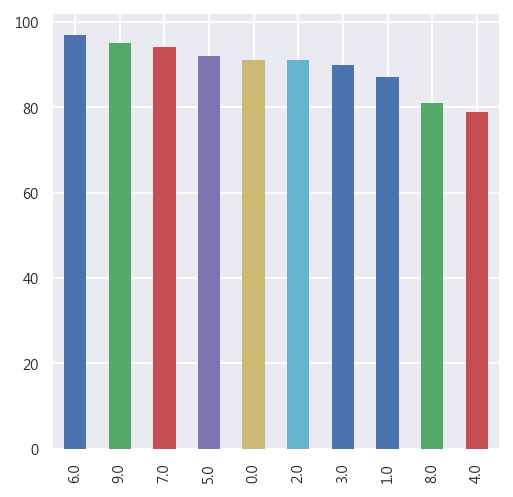

In [23]:
print(TrainY.value_counts())
TrainData_for_SCAL[TargetY].value_counts().plot(kind='bar', figsize=(4, 4))

## <font color=DARKBLUE>觀察整體資料散佈情形，以PCA降維畫出</font>

在進行 Classification 分類時，常會以各種降維方式，將資料散佈圖畫出，使用不同顏色表示不同類別，藉以觀察分類問題的難度


* reduced3 = PCA(n_components=3)
* reduced3 = TSNE(n_components=3)
* reduced3 = NMF(n_components=3)  註: 不能有負值

◎◎◎ Scaler方式也有其它方式可以挑選
* Scaler = QuantileTransformer()
* Scaler = MinMaxScaler()
* Scaler = StandardScaler()
* Scaler = RobustScaler()


<font color=Orange size=5%>◎◎◎ ↓</font> 將資料降維，選擇使用的 降維 及 Scaler 方法，可以增加或移除註解#自行選擇想用的方法

In [24]:
#Scaler = MinMaxScaler(feature_range=(0, 1))
#Scaler = StandardScaler()
#Scaler = RobustScaler()
#Scaler = Normalizer()
Scaler = QuantileTransformer()

#reduced3 = FastICA(n_components=3)
#reduced3 = TSNE(n_components=3)
#reduced3 = FactorAnalysis(n_components=3)
reduced3 = PCA(n_components=3)
#reduced3 = NMF(n_components=3)
#reduced3 = TruncatedSVD(n_components=3)
#reduced3 = LinearDiscriminantAnalysis(n_components=3)

Reduce3_Scaler = make_pipeline(Scaler, reduced3)



<img  src='../sys/sphx_glr_plot_pca_vs_lda_001.png' style="float:right;width:50%;">
如果是不困難的分類問題，降維後畫出來應該顏色混雜度很低，比如 PCA降維後的 的知名鳶尾花資料集，如圖所示：

- - - - -

◎◎◎ 最後一行為圖檔存檔指令，可將 # 註解移除並修改存檔檔名以儲存圖檔   要要億澳易
```PYTHON
plt.savefig('存檔檔名.jpg', dpi = 300);
```
<font color=OliveDrab size=5%>◎◎◎ ↓</font> 將資料降維並畫出，如果超過5000個樣本會只畫5000個

[[-0.1592713   1.73720301  0.15102058]]


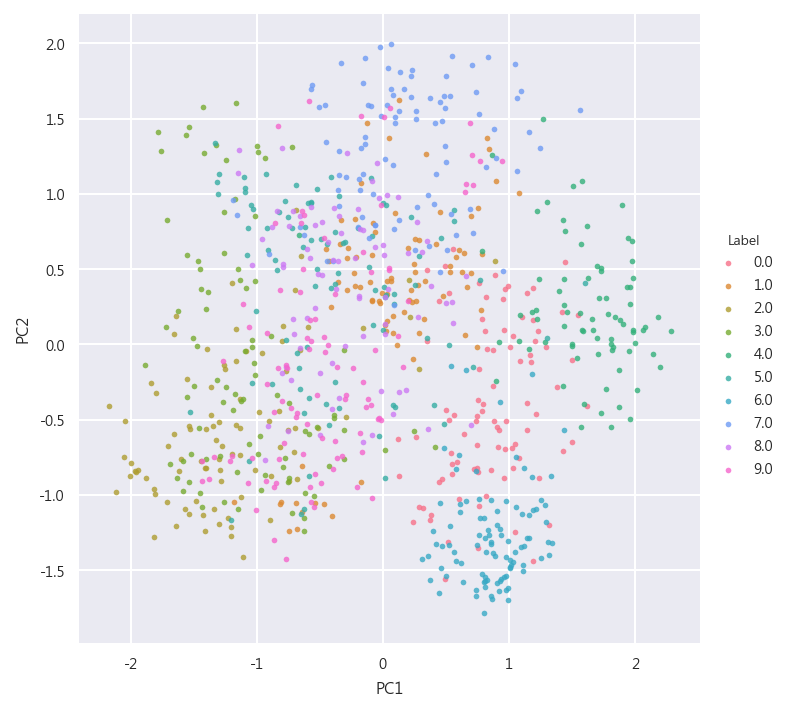

In [25]:
Draw_X = TrainX[:min(5000,TrainX.shape[0])]
Draw_Y = TrainY[:min(5000,TrainY.shape[0])]
DataX_Reduced = Reduce3_Scaler.fit_transform(Draw_X,Draw_Y)
print(DataX_Reduced[:1])

DataFrameX = pd.DataFrame(DataX_Reduced, columns = ['PC1', 'PC2', 'PC3'])
DataFrameX['Label'] = Draw_Y.values

sns.lmplot(x ='PC1', y ='PC2', data = DataFrameX, hue = 'Label',fit_reg = False, scatter_kws = {'s':8});
#plt.savefig('destfile.jpg', dpi = 300);

### <font color=DARKBLUE>可旋轉的模組畫出三維的情形</font>

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>   使用另一個可旋轉的模組畫出三維分佈圖，以觀察各種角度下的類別分佈情形

In [26]:
traces = []
for name in set(Draw_Y):
    trace = Scatter3d(
        x = DataX_Reduced[Draw_Y == name,0],
        y = DataX_Reduced[Draw_Y == name,1],
        z = DataX_Reduced[Draw_Y == name,2],
        mode = 'markers',
        name = name,
        marker = { 'size': 3},)
    traces.append(trace)
data = Data(traces)
layout = Layout(xaxis = XAxis(title = 'PC1', showline = False),
                yaxis = YAxis(title = 'PC2', showline = False),
                margin = dict(l = 0,r = 0,b = 0,t = 0))
fig = Figure(data = data,layout = layout)
py.iplot(fig,filename = 'TrainData-3d-scatter')


<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<a id="CLASSIFICATION"></a>


------
# <font color=DARKBLUE>開始分類</font>


## <font color=RED>資料驗證與演算法</font> 
<font color=RED>在進行機器學習之前，本節欄位請務必執行，以確認各資料<br> 
</font> 

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  檢查輸入資料
<img src='../sys/NeedExe.png' style="float:left;width:27%;"><br> <br> <br> 


In [27]:
if TrainData_for_SCAL.isnull().sum().sum() > 0 or TestData_for_SCAL.isnull().sum().sum() >0 :
    print('請回到 填補缺失值 章節進行填值處理')
if list(TrainData_for_SCAL.select_dtypes(include = [object]).columns) != [] or list(TestData_for_SCAL.select_dtypes(include = [object]).columns) != [] :
    print('請回到 將非數值特徵轉為數值 章節進行非數值特徵處理')


<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  設定資料，並進行 under sampling，如不需要請將最後三行加上#字註解

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [28]:
TrainX = TrainData_for_SCAL.drop([TargetY],axis=1)
TrainY = TrainData_for_SCAL[TargetY]

TestX = TestData_for_SCAL if TargetY not in TestData_for_SCAL.columns else TestData_for_SCAL.drop([TargetY],axis = 1)
TestY = None if (TargetY not in TestData_for_SCAL.columns) or TestData_for_SCAL[TargetY].isnull().all().all() else TestData_for_SCAL[TargetY]

TrainX_Na = TrainData_Na.drop([TargetY],axis = 1)


TestX_Na = TestData_Na if TargetY not in TestData_Na.columns.values else TestData_Na.drop([TargetY],axis = 1)

### Scaler
在執行分類演算法之前，時常需對資料進行前處理，將資料 Scaler 化。在此將各欄位 Scaler 先行計算。
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  計算 Train 與 Test 的 Scaler值，可以選擇 Scaler 方法，預設為 QuantileTransformer

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [29]:
#Scaler = QuantileTransformer()
Scaler = MinMaxScaler()
#Scaler = StandardScaler()
#Scaler = RobustScaler()
#Scaler = Normalizer()

TrainX_Scaler = Scaler.fit_transform(TrainX)
TestX_Scaler = Scaler.transform(TestX)

### Build DataSets 
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  
<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [30]:
TrainX = pd.DataFrame(TrainX,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
TrainX_Scaler = pd.DataFrame(TrainX_Scaler,columns = TrainData_for_SCAL.drop([TargetY],axis = 1).columns)
TestX = pd.DataFrame(TestX,columns = TestData_for_SCAL.drop([TargetY],axis = 1).columns)
TestX_Scaler = pd.DataFrame(TestX_Scaler,columns = TestData_for_SCAL.drop([TargetY],axis = 1).columns)
TrainY = pd.Series(TrainY) 
TestY = pd.Series(TestY) if TestY is not None else TestY

TrainX_Na = pd.DataFrame(TrainX_Na,columns = TrainData_Na.drop([TargetY],axis = 1).columns)


'同時建立表格儲存真實答案'
TrainPredict = pd.DataFrame()
TestPredict  = pd.DataFrame()
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
test_prob  = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)

train_prob['Truth'] = TrainY.values
if TestY is not None:
    test_prob['Truth'] = TestY.values 
    test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')

train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')


本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> train_test_split 切分訓練及驗證

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [31]:
import pickle
from sklearn.base import clone
from sklearn.utils import shuffle
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV, train_test_split

ordercols  = ['Algorithm','Accuracy','Precision','Recall','f1_score','ROC_AUC',"Cohen's kappa","JaccardSim","HammingLoss",'confusion_matrix']
TestReport = pd.DataFrame(columns=ordercols)
TrainReport = pd.DataFrame(columns=ordercols)
Train_Valid_Acc = {}
Train_Acc = {}
Test_Acc  = {}

from collections import OrderedDict
def Report_Metrics(TestReport,Method,y_true,y_pred,y_score) :
    temp = OrderedDict({'Algorithm' : Method,
            'Accuracy'  : accuracy_score(y_true,y_pred),
            'Precision' : precision_score(y_true,y_pred, average = 'weighted'),
            'Recall'    : recall_score(y_true,y_pred, average = 'weighted'),
            'f1_score'  : f1_score(y_true,y_pred, average = 'macro'),
            'confusion_matrix' : confusion_matrix(y_true,y_pred),
            "Cohen's kappa"    : cohen_kappa_score(y_true,y_pred),
            "HammingLoss" : -hamming_loss(y_true,y_pred),
            "JaccardSim"  : jaccard_similarity_score(y_true,y_pred),            
           })
    if NoClasses == 2:
        temp.update({'ROC_AUC' : roc_auc_score(y_true,y_score[:,1])})
    return pd.DataFrame([temp],columns = ordercols)

class OneFold:
    def split(self,dataX,dataY=None):
        yield dataX.index.values,dataX.index.values
    n_splits=1

folds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = Random_State) if n_splits >1 else OneFold()

Prob_Train_shape = (TrainX.shape[0],NoClasses) # if NoClasses > 2 else (TrainY.shape[0],1)
Prob_Test_shape = (TestX.shape[0],NoClasses)# if NoClasses > 2 else (TestY.shape[0],1)

print('訓練資料筆數：', TrainX.shape[0], '   訓練資料欄位數：',TrainX.shape[1])
print('測試資料筆數：', TestX.shape[0] , '   測試資料欄位數：',TestX.shape[1])

訓練資料筆數： 897    訓練資料欄位數： 64
測試資料筆數： 899    測試資料欄位數： 64


### 分類演算法
接下來會使用數種分類演算法進行分類，儲存分類模型並產出分類結果

<font color=CRISOM>每個演算法都會產生預測答案的欄位 (可能包含答案與其機率) ，並存於 Test_answer.CSV 檔案中，如果重複執行演算法，則前次結果會被覆蓋掉 </font> 


<br>
<font color=RED>在進行機器學習之前，本欄位請務必執行，以載入各種資料庫  </font> 


<font color=OliveDrab size=5%> ◎◎◎ ↓ </font> 導入演算法資料庫並建立 Baseline 分類器

<img src='../sys/NeedExe.png' style="float:left;width:27%;">

In [32]:
from sklearn.dummy import DummyClassifier

clf_probs = np.zeros(Prob_Train_shape)

clf = DummyClassifier(strategy = 'stratified',random_state = Random_State)

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX,TrainY)) :
    train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

    clf.fit(train_x, train_y)
    
    clf_probs[valid_idx] += clf.predict_proba(valid_x).copy() 
    
acc_dummy = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf.classes_[np.argmax(clf_probs,axis=1)],average='macro')
    
print ('DummyClassifier 的交叉驗證 ROC AUC：'+str (acc_dummy) +'\n' if NoClasses == 2 
       else 'DummyClassifier 的交叉驗證準確率：'+str (acc_dummy) +'\n')

report = classification_report(TrainY, clf.classes_[np.argmax(clf_probs,axis=1)])
print('以下是 DummyClassifier 的分類與驗證，這是用來作為Baseline的分類器，不具備分類預測能力', os.linesep,report)


DummyClassifier 的交叉驗證準確率：0.10936619926048394

以下是 DummyClassifier 的分類與驗證，這是用來作為Baseline的分類器，不具備分類預測能力 
              precision    recall  f1-score   support

        0.0       0.09      0.08      0.08        91
        1.0       0.07      0.07      0.07        87
        2.0       0.08      0.09      0.09        91
        3.0       0.07      0.07      0.07        90
        4.0       0.09      0.11      0.10        79
        5.0       0.14      0.14      0.14        92
        6.0       0.11      0.11      0.11        97
        7.0       0.12      0.12      0.12        94
        8.0       0.15      0.16      0.16        81
        9.0       0.18      0.15      0.16        95

avg / total       0.11      0.11      0.11       897




<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>


<a id="DecisionTree"></a>

## <font color=DARKBLUE>使用決策樹進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立決策樹模型，並以 cross-validation 檢驗效能

In [33]:
from sklearn.tree import DecisionTreeClassifier
clfname='DecisionTree'

clf = DecisionTreeClassifier(random_state = Random_State,class_weight ='balanced')

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

DecisionTree 的初步驗證 f1準確率：0.82839647

以下是  DecisionTree  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       0.97      0.97      0.97        31
        1.0       0.75      0.72      0.74        29
        2.0       0.88      0.68      0.76        31
        3.0       0.78      0.83      0.81        30
        4.0       0.79      0.85      0.82        27
        5.0       0.93      0.84      0.88        31
        6.0       0.89      0.94      0.91        33
        7.0       0.80      0.88      0.84        32
        8.0       0.74      0.74      0.74        27
        9.0       0.79      0.84      0.82        32

avg / total       0.83      0.83      0.83       303

DecisionTree  初步驗證的準確度為 0.82839647 ，大約是 Baseline DummyClassifier 的 7.575 倍


### <font color=DARKBLUE>建立決策樹</font>
 
 使用整個資料建立決策樹
 <!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 32}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立決策樹，並將其儲存為 clfdec.model (格式為 pickle檔案)

In [34]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


DecisionTree 1-fold 的 f1準確率：0.82839647

DecisionTree 2-fold 的 f1準確率：0.85321184

DecisionTree 3-fold 的 f1準確率：0.83103696

完整交叉驗證準確率：0.83763291

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9355    0.9560    0.9457        91
        1.0     0.7791    0.7701    0.7746        87
        2.0     0.8333    0.8242    0.8287        91
        3.0     0.8387    0.8667    0.8525        90
        4.0     0.8243    0.7722    0.7974        79
        5.0     0.8526    0.8804    0.8663        92
        6.0     0.8800    0.9072    0.8934        97
        7.0     0.8830    0.8830    0.8830        94
        8.0     0.7284    0.7284    0.7284        81
        9.0     0.8242    0.7895    0.8065        95

avg / total     0.8400    0.8406    0.8401       897



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

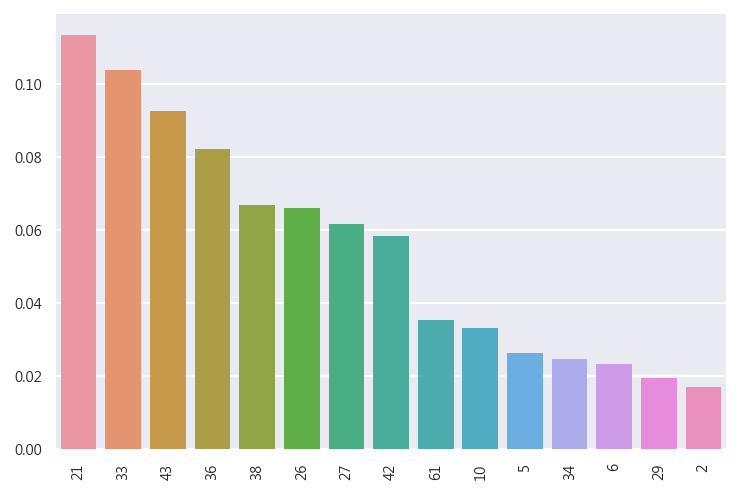

In [35]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用決策樹進行預測</font>
#### 讀取clfdec.model，Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [36]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.86051578

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.8660    0.9767    0.9180        86
        1.0     0.6953    0.9368    0.7982        95
        2.0     0.7745    0.9186    0.8404        86
        3.0     0.9000    0.7742    0.8324        93
        4.0     0.9634    0.7745    0.8587       102
        5.0     0.9080    0.8778    0.8927        90
        6.0     0.9500    0.9048    0.9268        84
        7.0     0.9048    0.8941    0.8994        85
        8.0     0.8701    0.7204    0.7882        93
        9.0     0.8659    0.8353    0.8503        85

avg / total     0.8699    0.8587    0.8590       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="RandomForest"></a>

## <font color=DARKBLUE>使用隨機森林進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立隨機森林模型，並以 cross-validation 檢驗效能

In [37]:
from sklearn.ensemble import RandomForestClassifier
clfname='RandomForest'
clf = RandomForestClassifier(random_state=Random_State,n_jobs=n_jobs,n_estimators =100,class_weight ='balanced_subsample')

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

/opt/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



RandomForest 的初步驗證 f1準確率：0.9634801

以下是  RandomForest  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       0.97      1.00      0.98        31
        1.0       0.94      1.00      0.97        29
        2.0       1.00      1.00      1.00        31
        3.0       1.00      0.93      0.97        30
        4.0       0.93      0.96      0.95        27
        5.0       1.00      0.94      0.97        31
        6.0       1.00      1.00      1.00        33
        7.0       0.89      0.97      0.93        32
        8.0       0.96      0.96      0.96        27
        9.0       0.97      0.88      0.92        32

avg / total       0.97      0.96      0.96       303

RandomForest  初步驗證的準確度為 0.9634801 ，大約是 Baseline DummyClassifier 的 8.81 倍


### <font color=DARKBLUE>建立隨機森林</font>



<!---
{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 90}
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立隨機森林，並將其儲存為 clfrfc.model (格式為 pickle檔案)

In [38]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


RandomForest 1-fold 的 f1準確率：0.9634801

RandomForest 2-fold 的 f1準確率：0.97000979

RandomForest 3-fold 的 f1準確率：0.96786127

完整交叉驗證準確率：0.96713082

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9890    0.9890    0.9890        91
        1.0     0.9451    0.9885    0.9663        87
        2.0     1.0000    0.9780    0.9889        91
        3.0     0.9775    0.9667    0.9721        90
        4.0     0.9506    0.9747    0.9625        79
        5.0     0.9570    0.9674    0.9622        92
        6.0     1.0000    0.9897    0.9948        97
        7.0     0.9485    0.9787    0.9634        94
        8.0     0.9375    0.9259    0.9317        81
        9.0     0.9667    0.9158    0.9405        95

avg / total     0.9680    0.9677    0.9676       897



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

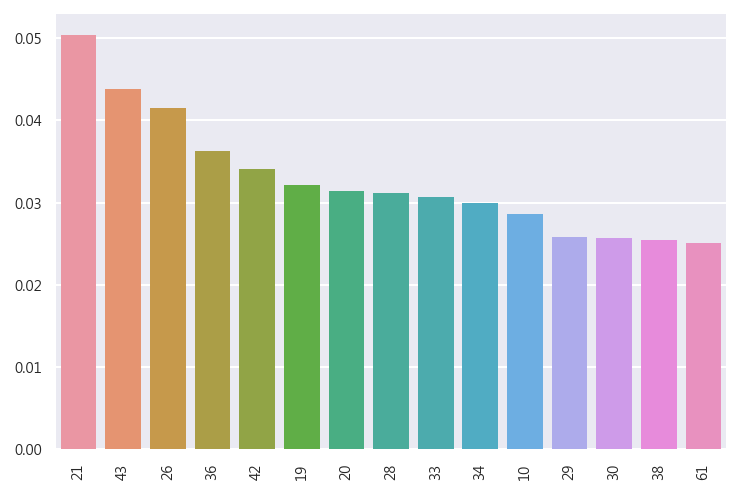

In [39]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用隨機森林進行預測</font>
#### 讀取clfrfc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告

如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [40]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.95436856

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9770    0.9884    0.9827        86
        1.0     0.9126    0.9895    0.9495        95
        2.0     0.9765    0.9651    0.9708        86
        3.0     0.9775    0.9355    0.9560        93
        4.0     0.9706    0.9706    0.9706       102
        5.0     0.9655    0.9333    0.9492        90
        6.0     0.9878    0.9643    0.9759        84
        7.0     0.9239    1.0000    0.9605        85
        8.0     0.9639    0.8602    0.9091        93
        9.0     0.8989    0.9412    0.9195        85

avg / total     0.9556    0.9544    0.9542       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="NaiveBayes"></a>

## <font color=DARKBLUE>使用 ExtraTree 進行分類 </font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 ExtraTree 模型，並以 cross-validation 檢驗效能

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
clf =  ExtraTreesClassifier(n_estimators=100,class_weight ='balanced_subsample', random_state=Random_State)
clfname='ExtraTree'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

ExtraTree 的初步驗證 f1準確率：0.9831495

以下是  ExtraTree  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.97      1.00      0.98        29
        2.0       1.00      1.00      1.00        31
        3.0       1.00      1.00      1.00        30
        4.0       0.96      1.00      0.98        27
        5.0       1.00      0.94      0.97        31
        6.0       1.00      1.00      1.00        33
        7.0       0.97      1.00      0.98        32
        8.0       0.96      0.96      0.96        27
        9.0       0.97      0.94      0.95        32

avg / total       0.98      0.98      0.98       303

ExtraTree  初步驗證的準確度為 0.9831495 ，大約是 Baseline DummyClassifier 的 8.99 倍


### <font color=DARKBLUE>建立 ExtraTree </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 ExtraTree，並將其儲存為 clfgnb.model (格式為 pickle檔案)

In [42]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


ExtraTree 1-fold 的 f1準確率：0.9831495

ExtraTree 2-fold 的 f1準確率：0.97344283

ExtraTree 3-fold 的 f1準確率：0.98307555

完整交叉驗證準確率：0.97990581

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9890    0.9890    0.9890        91
        1.0     0.9773    0.9885    0.9829        87
        2.0     1.0000    0.9890    0.9945        91
        3.0     0.9677    1.0000    0.9836        90
        4.0     0.9750    0.9873    0.9811        79
        5.0     0.9670    0.9565    0.9617        92
        6.0     0.9896    0.9794    0.9845        97
        7.0     0.9792    1.0000    0.9895        94
        8.0     0.9753    0.9753    0.9753        81
        9.0     0.9780    0.9368    0.9570        95

avg / total     0.9800    0.9799    0.9799       897



### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

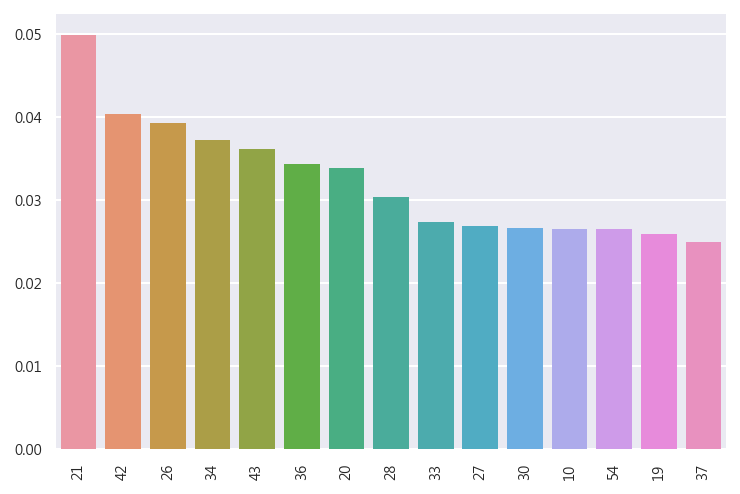

In [43]:
col_size = len(TrainX.columns) if TrainX.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 ExtraTree 進行預測</font>
#### 讀取clf.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [44]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.9677465

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9885    1.0000    0.9942        86
        1.0     0.9307    0.9895    0.9592        95
        2.0     0.9884    0.9884    0.9884        86
        3.0     0.9773    0.9247    0.9503        93
        4.0     1.0000    0.9804    0.9901       102
        5.0     0.9670    0.9778    0.9724        90
        6.0     0.9765    0.9881    0.9822        84
        7.0     0.9341    1.0000    0.9659        85
        8.0     0.9535    0.8817    0.9162        93
        9.0     0.9643    0.9529    0.9586        85

avg / total     0.9682    0.9677    0.9675       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="XGboost"></a>

## <font color=DARKBLUE>使用 XGboost 進行分類 (Gradient Boosting)</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 XGboost 模型，並以 cross-validation 檢驗效能

In [45]:
import xgboost as xgb
temp = TrainData[TargetY].value_counts().sort_values(ascending = False).tolist() if NoClasses == 2 else None 
clf = xgb.XGBClassifier(nthread = n_jobs,n_estimators=1000, learning_rate=0.2, tree_method ='hist',grow_policy ='lossguide',scale_pos_weight = temp[0]/temp[1] if NoClasses == 2 else 1)
#param = {'max_depth':5, 'objective':'multi:softmax', 'subsample':0.8, 'n_estimators':1000,'colsample_bytree':0.8, 'eta':0.1, 'nthread' : n_jobs,'tree_method':'gpu_hist',} #
#clf = xgb.XGBClassifier(**param)
del temp
clfname='XGBoost'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Na.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Na.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y,  eval_metric='auc' if NoClasses == 2 else 'mlogloss'
        ,eval_set = [(train_x, train_y), (valid_x, valid_y)], verbose = 100,early_stopping_rounds = 100)
    
valid_y_pred_prob = clf.predict_proba(valid_x,ntree_limit=clf.best_iteration).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
print( os.linesep)    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')




[09:03:53] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[0]	validation_0-mlogloss:1.67272	validation_1-mlogloss:1.75696
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 100 rounds.
[100]	validation_0-mlogloss:0.010102	validation_1-mlogloss:0.206455
[200]	validation_0-mlogloss:0.008408	validation_1-mlogloss:0.203967
Stopping. Best iteration:
[174]	validation_0-mlogloss:0.008606	validation_1-mlogloss:0.203716



XGBoost 的初步驗證 f1準確率：0.93754054

以下是  XGBoost  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.90      0.97      0.93        29
        2.0       1.00      0.94      0.97        31
        3.0       1.00      0.87      0.93        30
        4.0       0.84      0.96      0.90        27
        5.0       1.00      0.94      0.97        31


### <font color=DARKBLUE>建立 XGboost </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 XGboost，並將其儲存為 clfxgb.model (格式為 pickle檔案)

In [46]:

clf_probs = np.zeros(Prob_Train_shape)

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Na.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Na.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y,eval_set = [(train_x, train_y), (valid_x, valid_y)],eval_metric='auc' if NoClasses == 2 else 'mlogloss', verbose = 100,early_stopping_rounds = 100)
    prob = clf.predict_proba(valid_x, ntree_limit=clf.best_iteration) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')

[09:03:54] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[0]	validation_0-mlogloss:1.67272	validation_1-mlogloss:1.75696
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 100 rounds.
[100]	validation_0-mlogloss:0.010102	validation_1-mlogloss:0.206455
[200]	validation_0-mlogloss:0.008408	validation_1-mlogloss:0.203967
Stopping. Best iteration:
[174]	validation_0-mlogloss:0.008606	validation_1-mlogloss:0.203716

XGBoost 1-fold 的 f1準確率：0.93754054

[09:03:55] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
[0]	validation_0-mlogloss:1.66312	validation_1-mlogloss:1.74111
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 100 rounds.
[100]	validation_0-mlogloss:0.009837	validation_1-mlogloss:0.17892
[200]	v

### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

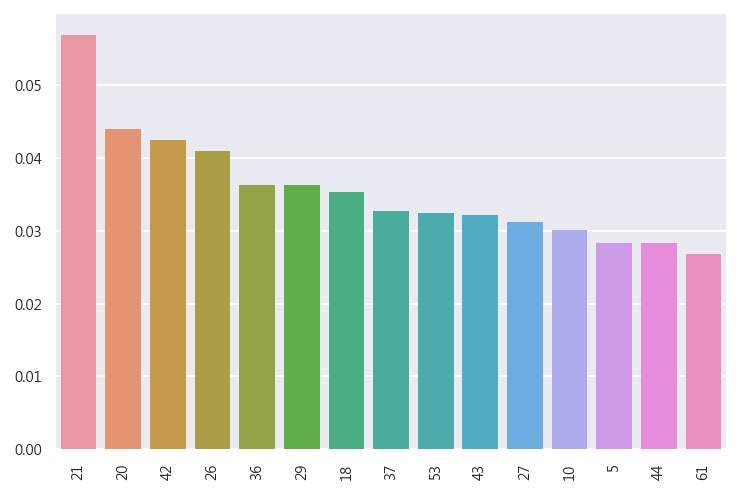

In [47]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 XGboost 進行預測</font>
#### 讀取clfxgb.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [48]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Na,ntree_limit=clf.best_iteration)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.93427784

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9540    0.9651    0.9595        86
        1.0     0.8600    0.9053    0.8821        95
        2.0     1.0000    0.9419    0.9701        86
        3.0     0.9655    0.9032    0.9333        93
        4.0     0.9896    0.9314    0.9596       102
        5.0     0.9239    0.9444    0.9341        90
        6.0     0.9759    0.9643    0.9701        84
        7.0     0.9333    0.9882    0.9600        85
        8.0     0.8632    0.8817    0.8723        93
        9.0     0.8864    0.9176    0.9017        85

avg / total     0.9350    0.9333    0.9336       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="lightGBM"></a>

## <font color=DARKBLUE>使用 lightGBM 進行分類 (Gradient Boosting)</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 lightGBM 模型，並以 cross-validation 檢驗效能

In [49]:

from lightgbm import LGBMClassifier
clf = LGBMClassifier(nthread = n_jobs,n_estimators=2000,is_unbalance = True,learning_rate=0.05,tree_learner='voting',boosting_type='goss')
clfname='LightGBM'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Na.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Na.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y,eval_metric='auc' if NoClasses == 2 else 'multi_logloss'
        ,eval_set = [(train_x, train_y), (valid_x, valid_y)], verbose = 100,early_stopping_rounds = 100)
    
valid_y_pred_prob = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
print( os.linesep)    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')




Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.131001	valid_1's multi_logloss: 0.339625
[200]	training's multi_logloss: 0.0172055	valid_1's multi_logloss: 0.176119
[300]	training's multi_logloss: 0.00249343	valid_1's multi_logloss: 0.139666
[400]	training's multi_logloss: 0.000388357	valid_1's multi_logloss: 0.127256
[500]	training's multi_logloss: 6.62223e-05	valid_1's multi_logloss: 0.121902
[600]	training's multi_logloss: 1.82147e-05	valid_1's multi_logloss: 0.125297
Early stopping, best iteration is:
[508]	training's multi_logloss: 5.81144e-05	valid_1's multi_logloss: 0.121434


LightGBM 的初步驗證 f1準確率：0.96044889

以下是  LightGBM  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.94      1.00      0.97        29
        2.0       0.97      0.97      0.97        31
        3.0       1.00      0.87      0.93        30
        4.0       0.96     

### <font color=DARKBLUE>建立 lightGBM </font>

<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 lightGBM ，並將其儲存為 clfgbm.model (格式為 pickle檔案)

In [50]:

clf_probs = np.zeros(Prob_Train_shape)

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Na.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Na.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y,eval_metric='auc' if NoClasses == 2 else 'multi_logloss'
                ,eval_set = [(train_x, train_y), (valid_x, valid_y)], verbose = 100,early_stopping_rounds = 100)
    prob = clf.predict_proba(valid_x, num_iteration=clf.best_iteration_) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')

Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.131001	valid_1's multi_logloss: 0.339625
[200]	training's multi_logloss: 0.0172055	valid_1's multi_logloss: 0.176119
[300]	training's multi_logloss: 0.00249343	valid_1's multi_logloss: 0.139666
[400]	training's multi_logloss: 0.000388357	valid_1's multi_logloss: 0.127256
[500]	training's multi_logloss: 6.62223e-05	valid_1's multi_logloss: 0.121902
[600]	training's multi_logloss: 1.82147e-05	valid_1's multi_logloss: 0.125297
Early stopping, best iteration is:
[508]	training's multi_logloss: 5.81144e-05	valid_1's multi_logloss: 0.121434
LightGBM 1-fold 的 f1準確率：0.96044889

Training until validation scores don't improve for 100 rounds.
[100]	training's multi_logloss: 0.132482	valid_1's multi_logloss: 0.332153
[200]	training's multi_logloss: 0.0174201	valid_1's multi_logloss: 0.181076
[300]	training's multi_logloss: 0.00258512	valid_1's multi_logloss: 0.139099
[400]	training's multi_logloss: 0.0

### 模型分析

同時畫出各特徵的重要程度 **不是每一個演算法都能呈現特徵重要度**

<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  畫出前15重要的 feature 的重要程度

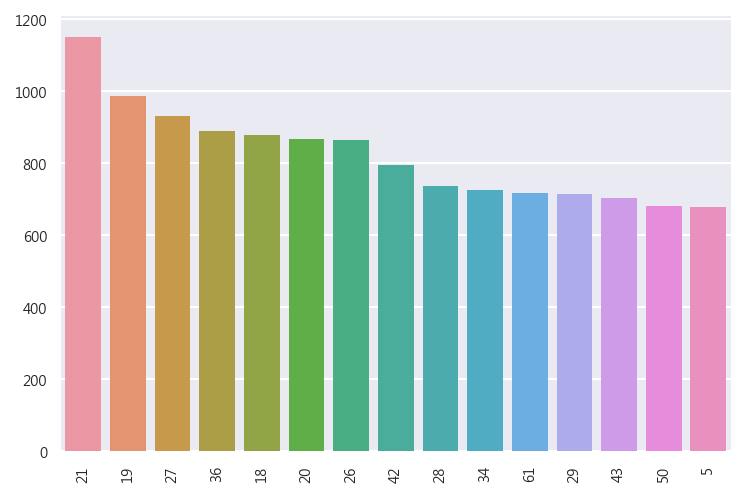

In [51]:
col_size = len(TrainX_Na.columns) if TrainX_Na.columns.size < 15 else 15
important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Na.columns),reverse = True)]
sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

### <font color=DARKBLUE>使用 lightGBM 進行預測</font>
#### 讀取clfgbm.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [52]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Na, num_iteration=clf.best_iteration_)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.94925198

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9773    1.0000    0.9885        86
        1.0     0.8911    0.9474    0.9184        95
        2.0     1.0000    0.9651    0.9822        86
        3.0     0.9556    0.9247    0.9399        93
        4.0     0.9900    0.9706    0.9802       102
        5.0     0.9444    0.9444    0.9444        90
        6.0     0.9878    0.9643    0.9759        84
        7.0     0.9444    1.0000    0.9714        85
        8.0     0.8977    0.8495    0.8729        93
        9.0     0.9080    0.9294    0.9186        85

avg / total     0.9494    0.9488    0.9488       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="Ridge"></a>

## <font color=DARKBLUE>使用 Ridge classifier 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Ridge classifier 模型，並以 cross-validation 檢驗效能

In [53]:
from sklearn.linear_model import RidgeClassifier
from sklearn.calibration import CalibratedClassifierCV
Ridge = RidgeClassifier()
clf = CalibratedClassifierCV(Ridge) 
clfname='RidgeClassifier'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

RidgeClassifier 的初步驗證 f1準確率：0.94621744

以下是  RidgeClassifier  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.90      0.90      0.90        29
        2.0       0.94      0.94      0.94        31
        3.0       0.93      0.90      0.92        30
        4.0       0.96      0.96      0.96        27
        5.0       1.00      0.97      0.98        31
        6.0       1.00      1.00      1.00        33
        7.0       0.97      0.94      0.95        32
        8.0       0.86      0.93      0.89        27
        9.0       0.91      0.94      0.92        32

avg / total       0.95      0.95      0.95       303

RidgeClassifier  初步驗證的準確度為 0.94621744 ，大約是 Baseline DummyClassifier 的 8.652 倍


### <font color=DARKBLUE>建立 Ridge classifier  </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Ridge classifier ，並將其儲存為 clfrig.model (格式為 pickle檔案)

In [54]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


RidgeClassifier 1-fold 的 f1準確率：0.94621744

RidgeClassifier 2-fold 的 f1準確率：0.92038361

RidgeClassifier 3-fold 的 f1準確率：0.93058745

完整交叉驗證準確率：0.93245305

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9674    0.9780    0.9727        91
        1.0     0.8696    0.9195    0.8939        87
        2.0     0.9565    0.9670    0.9617        91
        3.0     0.9425    0.9111    0.9266        90
        4.0     0.9865    0.9241    0.9542        79
        5.0     0.9565    0.9565    0.9565        92
        6.0     0.9896    0.9794    0.9845        97
        7.0     0.9468    0.9468    0.9468        94
        8.0     0.8933    0.8272    0.8590        81
        9.0     0.8350    0.9053    0.8687        95

avg / total     0.9344    0.9331    0.9333       897



### <font color=DARKBLUE>使用 Ridge classifier  進行預測</font>
#### 讀取clfrig.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [55]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.92673394

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9663    1.0000    0.9829        86
        1.0     0.8788    0.9158    0.8969        95
        2.0     0.9432    0.9651    0.9540        86
        3.0     0.9438    0.9032    0.9231        93
        4.0     1.0000    0.9510    0.9749       102
        5.0     0.9341    0.9444    0.9392        90
        6.0     0.9639    0.9524    0.9581        84
        7.0     0.9444    1.0000    0.9714        85
        8.0     0.8111    0.7849    0.7978        93
        9.0     0.8795    0.8588    0.8690        85

avg / total     0.9266    0.9266    0.9263       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="Ridge"></a>

## <font color=DARKBLUE>使用 SVM 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 SVM 模型，並以 cross-validation 檢驗效能

In [56]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
max_samples = np.clip((1e4/TrainX.shape[0]),1e-3,1)
n_estimators = int(np.clip((TrainX.shape[0]/1e4),1,10))
clf = BaggingClassifier(SVC(kernel='rbf', probability=True,random_state = Random_State,class_weight ='balanced'), max_samples=max_samples, n_estimators=n_estimators,random_state = Random_State)
#clf=SVC(kernel='rbf', probability=True,random_state = Random_State)
clfname='SVM'
print('  Sample Rate 暫定為：',max_samples.round(5) ,'  Estimators 暫定數量為：',n_estimators ) #, metric=mydist

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

  Sample Rate 暫定為： 1.0   Estimators 暫定數量為： 1
SVM 的初步驗證 f1準確率：0.92041516

以下是  SVM  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.90      0.93      0.92        29
        2.0       0.97      0.97      0.97        31
        3.0       0.93      0.83      0.88        30
        4.0       0.96      0.96      0.96        27
        5.0       1.00      0.81      0.89        31
        6.0       1.00      1.00      1.00        33
        7.0       0.86      1.00      0.93        32
        8.0       0.86      0.89      0.87        27
        9.0       0.76      0.81      0.79        32

avg / total       0.92      0.92      0.92       303

SVM  初步驗證的準確度為 0.92041516 ，大約是 Baseline DummyClassifier 的 8.416 倍


### <font color=DARKBLUE>建立 SVM </font>



<!---
{'C': 1.0, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'rbf'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 SVM，並將其儲存為 clfsvc.model (格式為 pickle檔案)

In [57]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


SVM 1-fold 的 f1準確率：0.92041516

SVM 2-fold 的 f1準確率：0.94951126

SVM 3-fold 的 f1準確率：0.94421628

完整交叉驗證準確率：0.93815949

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     1.0000    0.9890    0.9945        91
        1.0     0.9101    0.9310    0.9205        87
        2.0     0.9778    0.9670    0.9724        91
        3.0     0.9318    0.9111    0.9213        90
        4.0     0.9744    0.9620    0.9682        79
        5.0     0.9545    0.9130    0.9333        92
        6.0     0.9898    1.0000    0.9949        97
        7.0     0.9381    0.9681    0.9529        94
        8.0     0.8831    0.8395    0.8608        81
        9.0     0.8333    0.8947    0.8629        95

avg / total     0.9395    0.9387    0.9388       897



### <font color=DARKBLUE>使用 SVM 進行預測</font>
#### 讀取clfsvc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [58]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.92933084

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9773    1.0000    0.9885        86
        1.0     0.8515    0.9053    0.8776        95
        2.0     0.9872    0.8953    0.9390        86
        3.0     0.9770    0.9140    0.9444        93
        4.0     1.0000    0.9510    0.9749       102
        5.0     0.9556    0.9556    0.9556        90
        6.0     0.9880    0.9762    0.9820        84
        7.0     0.8854    1.0000    0.9392        85
        8.0     0.8621    0.8065    0.8333        93
        9.0     0.8261    0.8941    0.8588        85

avg / total     0.9314    0.9288    0.9291       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="K-NN"></a>

## <font color=DARKBLUE>使用 KNN 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 KNN 模型，並以 cross-validation 檢驗效能

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
k = int(np.cbrt(TrainX.shape[0])*1.25)
temp=TrainX.shape[0]*TrainX.shape[1]*(n_splits-1)/n_splits
max_samples = np.clip((1e6 / temp),1e-3,1)
n_estimators = int(np.clip((temp/1e6),1,10))
print('k 值暫定為：',k, '  Sample Rate 暫定為：',max_samples.round(5) ,'  Estimators 暫定數量為：',n_estimators ) #, metric=mydist

clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=k,algorithm ='brute',p=1 if temp>1e6 else 2), random_state = Random_State,
                        max_samples=max_samples, n_estimators=n_estimators)
del temp 
clfname='K-NN'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

k 值暫定為： 12   Sample Rate 暫定為： 1.0   Estimators 暫定數量為： 1
K-NN 的初步驗證 f1準確率：0.92627755

以下是  K-NN  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.81      1.00      0.89        29
        2.0       1.00      0.97      0.98        31
        3.0       0.97      0.93      0.95        30
        4.0       0.96      0.93      0.94        27
        5.0       0.93      0.81      0.86        31
        6.0       1.00      1.00      1.00        33
        7.0       0.89      1.00      0.94        32
        8.0       0.92      0.85      0.88        27
        9.0       0.83      0.78      0.81        32

avg / total       0.93      0.93      0.93       303

K-NN  初步驗證的準確度為 0.92627755 ，大約是 Baseline DummyClassifier 的 8.47 倍


### <font color=DARKBLUE>建立 KNN </font>



<!---
{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 KNN，並將其儲存為 clfknc.model (格式為 pickle檔案)

In [78]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 

clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


K-NN 1-fold 的 f1準確率：0.92627755

K-NN 2-fold 的 f1準確率：0.9561103

K-NN 3-fold 的 f1準確率：0.94244566

完整交叉驗證準確率：0.94185563

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9891    1.0000    0.9945        91
        1.0     0.8750    0.9655    0.9180        87
        2.0     0.9663    0.9451    0.9556        91
        3.0     0.9560    0.9667    0.9613        90
        4.0     0.9740    0.9494    0.9615        79
        5.0     0.9438    0.9130    0.9282        92
        6.0     0.9897    0.9897    0.9897        97
        7.0     0.9485    0.9787    0.9634        94
        8.0     0.8919    0.8148    0.8516        81
        9.0     0.8947    0.8947    0.8947        95

avg / total     0.9435    0.9431    0.9428       897



### <font color=DARKBLUE>使用 KNN 進行預測</font>
#### 讀取clfknc.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [79]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.95131079

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9773    1.0000    0.9885        86
        1.0     0.8846    0.9684    0.9246        95
        2.0     0.9877    0.9302    0.9581        86
        3.0     0.9674    0.9570    0.9622        93
        4.0     0.9898    0.9510    0.9700       102
        5.0     0.9773    0.9556    0.9663        90
        6.0     0.9651    0.9881    0.9765        84
        7.0     0.9140    1.0000    0.9551        85
        8.0     0.9059    0.8280    0.8652        93
        9.0     0.9524    0.9412    0.9467        85

avg / total     0.9520    0.9511    0.9508       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="SGD"></a>

## <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行分類</font>


### 分別以 split 產生 report 以及 cross-validation 驗證演算法 

- wiki : [cross-validation 交叉驗證](https://zh.wikipedia.org/wiki/%E4%BA%A4%E5%8F%89%E9%A9%97%E8%AD%89)

本範例中以 **4-fold** 進行驗證，以 **75%** 的有答案資料 (Training Data)進行建模，以剩餘的 **25%** (valid)來計算正確率。

* train_test_split : 將資料進行切分去訓練模型
* classification_report : 依據訓練的模型，預測 valid 資料，並產生結果表格
* cross_val_score : 將資料進行切分去訓練模型，重複執行交叉驗證，並產生 Accuracy 平均 

**train_test_split** 的 **classification_report**是其中一次切割之後的驗證結果，可能會不足以說明模型穩定度

**cross_val_score**則是數次交叉驗證的平均，一般而言可用以預測整體模型準確率

<!--- ['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']
--->

<font color=OliveDrab size=5%>◎◎◎ ↓ </font> 建立 Stochastic Gradient Descent 模型，並以 cross-validation 檢驗效能

In [62]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(alpha = 1e-4, max_iter = 1e3, loss = 'log' ,random_state = Random_State,class_weight ='balanced')
clfname='SGD'

(train_idx, valid_idx) = next(folds.split(TrainX, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]

clf.fit(train_x, train_y)
    
valid_y_pred_prob = clf.predict_proba(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(valid_y_pred_prob,axis=1)],average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report = classification_report(valid_y, clf.classes_[np.argmax(valid_y_pred_prob,axis=1)])
print('以下是 ',clfname,' 的初步驗證分類預測結果 : ', os.linesep,os.linesep,report)

    
print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

SGD 的初步驗證 f1準確率：0.95607855

以下是  SGD  的初步驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        31
        1.0       0.96      0.93      0.95        29
        2.0       1.00      1.00      1.00        31
        3.0       1.00      0.83      0.91        30
        4.0       0.93      0.96      0.95        27
        5.0       1.00      1.00      1.00        31
        6.0       1.00      1.00      1.00        33
        7.0       0.88      0.94      0.91        32
        8.0       0.87      0.96      0.91        27
        9.0       0.94      0.94      0.94        32

avg / total       0.96      0.96      0.96       303

SGD  初步驗證的準確度為 0.95607855 ，大約是 Baseline DummyClassifier 的 8.742 倍


### <font color=DARKBLUE>建立 Stochastic Gradient Descent </font>



<!---
{'alpha': 0.001,
 'class_weight': 'balanced',
 'eta0': 0.001,
 'learning_rate': 'optimal',
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'l1'}
--->
<font color=OliveDrab size=5%>◎◎◎ ↓ </font>  使用整個資料建立 Stochastic Gradient Descent，並將其儲存為 clfsgd.model (格式為 pickle檔案)

In [63]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY.iloc[valid_idx]
        clf = clone(clf)
        clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 
    


clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')


SGD 1-fold 的 f1準確率：0.95607855

SGD 2-fold 的 f1準確率：0.94267453

SGD 3-fold 的 f1準確率：0.96530685

完整交叉驗證準確率：0.95472913

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     1.0000    0.9890    0.9945        91
        1.0     0.9326    0.9540    0.9432        87
        2.0     0.9574    0.9890    0.9730        91
        3.0     0.9881    0.9222    0.9540        90
        4.0     0.9494    0.9494    0.9494        79
        5.0     0.9565    0.9565    0.9565        92
        6.0     0.9896    0.9794    0.9845        97
        7.0     0.9474    0.9574    0.9524        94
        8.0     0.9024    0.9136    0.9080        81
        9.0     0.9271    0.9368    0.9319        95

avg / total     0.9559    0.9554    0.9555       897



### <font color=DARKBLUE>使用 Stochastic Gradient Descent 進行預測</font>
#### 讀取clfsgd.model，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [64]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉驗證準確率：0.94609845

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     1.0000    1.0000    1.0000        86
        1.0     0.8958    0.9053    0.9005        95
        2.0     1.0000    0.9884    0.9942        86
        3.0     0.9767    0.9032    0.9385        93
        4.0     0.9900    0.9706    0.9802       102
        5.0     0.9451    0.9556    0.9503        90
        6.0     0.9425    0.9762    0.9591        84
        7.0     0.9659    1.0000    0.9827        85
        8.0     0.8602    0.8602    0.8602        93
        9.0     0.8851    0.9059    0.8953        85

avg / total     0.9460    0.9455    0.9455       899

測試資料的分類預測機率與結果已存入檔案



<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>


<font size=3% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[DecisionTree](#DecisionTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[RandomForest](#RandomForest) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[ExtraTree](#ExtraTree) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[XGboost](#XGboost) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[lightGBM](#lightGBM) </font>&nbsp;&nbsp; <br ><br >
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
<font size=4% face="Microsoft JhengHei">[Ridge](#Ridge) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SVM](#SVM) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[K-NN](#K-NN) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[SGD](#SGD) </font>&nbsp;&nbsp;
<font size=4% face="Microsoft JhengHei">[Deep Learning](#DeepLearning) </font>

<a id="DeepLearning"></a>

------
## <font color=DARKBLUE>使用深度學習(類神經網路)進行分類</font>
↓ : 建立Keras網路，因為類神經網路耗時，直接進行擬合訓練及預測

↓ : 建立一個數層的網路，以準確度為衡量標準，以validation的loss作為監測，一段時間沒改善就停止

In [65]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)

import functools
from keras import backend as K
import tensorflow as tf
def as_keras_metric(method):
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper
auc_roc = as_keras_metric(tf.metrics.auc)

TrainY_deep = TrainY if NoClasses == 2 else  pd.DataFrame(onehot_encoder.fit_transform(TrainY.values.reshape(-1,1)))
if TestY is not None:
    TestY_deep = TestY if NoClasses == 2 else pd.DataFrame(onehot_encoder.transform(TestY.values.reshape(-1,1)))
    
inverse_onehot = lambda x: onehot_encoder.active_features_[np.argmax(x.values,axis=1)] if isinstance(x, pd.DataFrame) else onehot_encoder.active_features_[np.argmax(x,axis=1)] 

from keras.models import Sequential, Model, clone_model
from keras.layers import Dense,Dropout,Input,concatenate
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import metrics
clfname='DeepLearning'

epochs = 25
early_stopping_monitor = EarlyStopping(patience = 5, monitor = 'val_loss', mode = 'min')
#save_best = ModelCheckpoint('Model/clfkeras_best_try.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')

M_in = Input(shape = (TrainX_Scaler.shape[1],))
M_1 = Dense(128, activation = 'relu')(M_in)
M_1 = Dropout(0.25)(M_1)
M_2 = Dense(64, activation = 'relu')(M_1)
M_2 = Dropout(0.25)(M_2)
M_3 = Dense(32, activation = 'relu')(M_2)
M_3 = Dropout(0.25)(M_3)
M_4 = Dense(32, activation = 'relu')(M_3)
M_4 = Dropout(0.25)(M_4)
M_5 = Dense(64, activation = 'relu')(M_3)
M_5 = Dropout(0.25)(M_4)
M_6 = Dense(64, activation = 'relu')(M_4)
M_6 = Dropout(0.25)(M_5)
M_out = Dense(1,  activation='sigmoid')(M_6) if NoClasses ==2 else Dense(NoClasses,  activation = 'softmax')(M_6)

clf = Model(inputs = M_in, outputs  = M_out)
clf.summary()
clf.save_weights('initial_w.h5')



/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
__________

In [66]:
(train_idx, valid_idx) = next(folds.split(TrainX_Scaler, TrainY)) 
flag_idx = train_idx
train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY_deep.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY_deep.iloc[valid_idx]

save_best = ModelCheckpoint('Model/'+clfname+str(1) +'.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')
    
clf.compile(loss = 'binary_crossentropy' if NoClasses==2 else 'categorical_crossentropy', optimizer = 'adam', metrics = [auc_roc] if NoClasses == 2 else ['accuracy'] )
clf.fit(train_x, train_y, epochs=epochs, batch_size = 32,validation_data = (valid_x, valid_y),
       shuffle = True,callbacks = [early_stopping_monitor,save_best])

valid_y_pred_prob = clf.predict(valid_x).copy() 
    
acc = roc_auc_score(valid_y,valid_y_pred_prob) if NoClasses == 2 else f1_score(inverse_onehot(valid_y),inverse_onehot(valid_y_pred_prob),average='macro')
    
print (clfname+' 的初步驗證 ROC AUC：'+str(acc.round(8)) +'\n' if NoClasses == 2 
       else clfname+' 的初步驗證 f1準確率：'+str(acc.round(8)) +'\n')

report =classification_report(valid_y, valid_y_pred_prob.round(0)) if NoClasses == 2 else classification_report(inverse_onehot(valid_y),inverse_onehot(valid_y_pred_prob))
print('以下是 ',clfname,' 的初步驗證分類預測結果', os.linesep,report)

print(clfname,' 初步驗證的準確度為', acc.round(8), '，大約是 Baseline DummyClassifier 的' , (acc / acc_dummy).round(3),'倍')

Train on 594 samples, validate on 303 samples
Epoch 1/25
594/594 [==============================] - 1s 2ms/step - loss: 2.3275 - acc: 0.0976 - val_loss: 2.2655 - val_acc: 0.2739
Epoch 2/25
594/594 [==============================] - 0s 174us/step - loss: 2.2594 - acc: 0.1785 - val_loss: 2.2036 - val_acc: 0.3729
Epoch 3/25
594/594 [==============================] - 0s 176us/step - loss: 2.1946 - acc: 0.1751 - val_loss: 2.0838 - val_acc: 0.3399
Epoch 4/25
594/594 [==============================] - 0s 175us/step - loss: 2.1148 - acc: 0.2121 - val_loss: 1.9295 - val_acc: 0.3366
Epoch 5/25
594/594 [==============================] - 0s 185us/step - loss: 2.0325 - acc: 0.2458 - val_loss: 1.8022 - val_acc: 0.3696
Epoch 6/25
594/594 [==============================] - 0s 175us/step - loss: 1.9123 - acc: 0.3098 - val_loss: 1.6803 - val_acc: 0.4290
Epoch 7/25
594/594 [==============================] - 0s 170us/step - loss: 1.8298 - acc: 0.3064 - val_loss: 1.5679 - val_acc: 0.5149
Epoch 8/25
594/594

####  <font color=DARKBLUE> 訓練類神經網路學習</font>
<a id="chapter-1"></a>

In [67]:
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX_Scaler, TrainY)) :
 
    if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)):
        train_x, train_y, valid_x, valid_y = TrainX_Scaler.iloc[train_idx], TrainY_deep.iloc[train_idx] ,TrainX_Scaler.iloc[valid_idx], TrainY_deep.iloc[valid_idx]
        save_best = ModelCheckpoint('Model/'+clfname+str(n_fold+1) +'.hdf5', save_best_only = True, monitor = 'val_loss', mode = 'min')
        clf =clone_model(clf)
        clf.load_weights('initial_w.h5')
        clf.compile(loss = 'binary_crossentropy' if NoClasses==2 else 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        clf.fit(train_x, train_y, epochs=epochs, batch_size = 32,validation_data = (valid_x, valid_y),
           shuffle = True,callbacks = [early_stopping_monitor,save_best],verbose=0)
    prob = clf.predict(valid_x) if (n_fold > 0) | (np.array_equiv(flag_idx ,train_idx)) else valid_y_pred_prob

    acc = roc_auc_score(valid_y, prob) if NoClasses == 2 else f1_score(inverse_onehot(valid_y),inverse_onehot(prob),average='macro')
    
    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
    clf_probs[valid_idx] += prob
    
clf_probs[:,0] = 1-clf_probs[:,0]  if NoClasses == 2 else clf_probs[:,0]

clf_preds = clf_probs[:,1].round(0) if NoClasses == 2 else inverse_onehot(clf_probs)       
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的預測結果準確率',os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf_probs[:,1].round(0)  if NoClasses == 2 else  inverse_onehot(clf_probs)
  
col_names = [clfname+'_0', clfname+'_1'] if NoClasses == 2 else [clfname +'_'+ str(int(s))  for s in onehot_encoder.active_features_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    
train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')



DeepLearning 1-fold 的 f1準確率：0.88887939

DeepLearning 2-fold 的 f1準確率：0.92551662

DeepLearning 3-fold 的 f1準確率：0.90611393

完整交叉驗證準確率：0.9066810246220711

以下為訓練資料的預測結果準確率 
              precision    recall  f1-score   support

        0.0     0.9890    0.9890    0.9890        91
        1.0     0.8889    0.9195    0.9040        87
        2.0     0.9783    0.9890    0.9836        91
        3.0     0.7589    0.9444    0.8416        90
        4.0     0.9625    0.9747    0.9686        79
        5.0     0.8660    0.9130    0.8889        92
        6.0     0.9697    0.9897    0.9796        97
        7.0     0.9381    0.9681    0.9529        94
        8.0     0.9574    0.5556    0.7031        81
        9.0     0.8696    0.8421    0.8556        95

avg / total     0.9173    0.9119    0.9086       897



### <font color=DARKBLUE>使用 類神經網路 進行預測</font>
#### 讀取clfkeras.h5，對Test data 預測，如果Test data 有答案則順便產生預測報告
如果出現 IOerror "Permission denied" ，請關閉 'Test_Answer.csv' 檔案並重新執行

In [68]:
from keras.models import load_model     
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    clf =  load_model(r"Model/"+clfname+str(i+1)+".hdf5")     
    clf_probs_test += clf.predict(TestX_Scaler)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] = clf_probs_test[:,1].round(0) if NoClasses == 2 else inverse_onehot(clf_probs_test)

colnames = [clfname+'_0', clfname+'_1']  if NoClasses == 2 else[clfname +'_'+ str(int(s))  for s in onehot_encoder.active_features_]
for i,col in enumerate( colnames ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:

    print ('完整交叉預測 ROC AUC：'+str (roc_auc_score(TestY,clf_probs_test[:,1])) +'\n' if NoClasses == 2 
       else '完整交叉預測準確率：'+str (f1_score(TestY,TestPredict[clfname].values,average='macro')) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的預測結果準確率',os.linesep,report)  
    

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

完整交叉預測準確率：0.9114931011735002

以下為測試資料的預測結果準確率 
              precision    recall  f1-score   support

        0.0     0.9885    1.0000    0.9942        86
        1.0     0.8462    0.9263    0.8844        95
        2.0     0.9535    0.9535    0.9535        86
        3.0     0.8269    0.9247    0.8731        93
        4.0     0.9706    0.9706    0.9706       102
        5.0     0.9355    0.9667    0.9508        90
        6.0     0.9651    0.9881    0.9765        84
        7.0     0.9043    1.0000    0.9497        85
        8.0     0.9474    0.5806    0.7200        93
        9.0     0.8372    0.8471    0.8421        85

avg / total     0.9173    0.9143    0.9105       899

測試資料的分類預測機率與結果已存入檔案




<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="ENSEMBLE"></a>

# 使用 Ensemble 集成模型進行預測

匯入各模型的訓練及預測機率值的檔案

In [69]:
Train_Prob = pd.read_csv(Output_train_prob)
Test_Prob = pd.read_csv(Output_test_prob)

TrainX_Ensemble = Train_Prob.drop([col for col in Train_Prob.columns.values if ((col in ['Truth']) or ('Ensemble' in col))],axis=1)
#TrainY_Ensemble = Train_Prob['Truth']
#TrainX_Ensemble = pd.concat([TrainX_Ensemble,TrainX],axis=1)         
#TrainX_Ensemble = TrainX
TestX_Ensemble = Test_Prob.drop([col for col in Test_Prob.columns.values if ((col in ['Truth']) or ('Ensemble' in col))],axis=1)
#TestY_Ensemble = None if ('Truth' not in Test_Prob.columns.values) else Test_Prob['Truth']       
#TestX_Ensemble = TestX

In [70]:
from sklearn.linear_model import LogisticRegression

clf = ExtraTreesClassifier(n_estimators=1000, random_state=Random_State)
clfname='Ensemble_Extra'

#clf = RandomForestClassifier(random_state=Random_State,n_jobs=n_jobs,n_estimators =500,class_weight ='balanced_subsample')
#clfname='Ensemble_RF'

#clf = CalibratedClassifierCV(Ridge,cv=10) 

#clf=LogisticRegression(class_weight ='balanced', random_state=Random_State,max_iter =10000)
clf_probs = np.zeros(Prob_Train_shape)
for n_fold, (train_idx, valid_idx) in enumerate(folds.split(TrainX, TrainY)) :
    train_x, train_y, valid_x, valid_y = TrainX_Ensemble.iloc[train_idx], TrainY.iloc[train_idx] ,TrainX_Ensemble.iloc[valid_idx], TrainY.iloc[valid_idx]
    clf.fit(train_x, train_y)
    prob = clf.predict_proba(valid_x)
    
    with open(r"Model/"+clfname+str(n_fold+1)+".model", "wb") as output_file:
        pickle.dump(clf, output_file) 
    acc = roc_auc_score(valid_y,prob[:,1]) if NoClasses == 2 else f1_score(valid_y,clf.classes_[np.argmax(prob,axis=1)],average='macro')

    print (clfname+' '+str(n_fold+1)+'-fold 的 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else clfname+' '+str(n_fold+1)+'-fold 的 f1準確率：'+str (acc.round(8)) +'\n')
        
    clf_probs[valid_idx] += prob 
    


clf_preds = clf.classes_[np.argmax(clf_probs,axis=1)]     
acc = roc_auc_score(TrainY,clf_probs[:,1]) if NoClasses == 2 else f1_score(TrainY,clf_preds,average='macro')
    
print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
       else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

report = classification_report(TrainY, clf_preds,digits=4)
print('以下為訓練資料的交叉驗證分類預測結果 : ',os.linesep,os.linesep,report)
        
TrainPredict = pd.DataFrame() if not os.path.exists(Output_train_Pred) else pd.read_csv(Output_train_Pred) 
train_prob = pd.DataFrame() if not os.path.exists(Output_train_prob) else pd.read_csv(Output_train_prob)
    
TrainPredict[clfname] = clf.classes_[np.argmax(clf_probs,axis=1)]  
  
col_names = [clfname +'_'+ str(int(s))  for s in clf.classes_] 
Train_pro_temp = pd.DataFrame(clf_probs, columns=col_names)
for col in col_names:
    train_prob[col] = Train_pro_temp[col]

TrainReport = pd.concat([TrainReport,Report_Metrics(
TrainReport,clfname,TrainY,clf_preds,clf_probs)]).drop_duplicates(subset=['Algorithm'],keep='last')
    



Ensemble_Extra 1-fold 的 f1準確率：0.97345453

Ensemble_Extra 2-fold 的 f1準確率：0.98093909

Ensemble_Extra 3-fold 的 f1準確率：0.97945576

完整交叉驗證準確率：0.97781315

以下為訓練資料的交叉驗證分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9891    1.0000    0.9945        91
        1.0     0.9885    0.9885    0.9885        87
        2.0     1.0000    1.0000    1.0000        91
        3.0     0.9886    0.9667    0.9775        90
        4.0     1.0000    0.9747    0.9872        79
        5.0     0.9462    0.9565    0.9514        92
        6.0     0.9897    0.9897    0.9897        97
        7.0     0.9684    0.9787    0.9735        94
        8.0     0.9518    0.9753    0.9634        81
        9.0     0.9574    0.9474    0.9524        95

avg / total     0.9778    0.9777    0.9777       897



In [71]:
clf_probs_test = np.zeros(Prob_Test_shape)

for i in range(n_splits):
    with open(r"Model/"+clfname+str(i+1)+".model", "rb") as input_file:
        clf = pickle.load(input_file)        
    clf_probs_test += clf.predict_proba(TestX_Ensemble)/n_splits
    
TestPredict = pd.DataFrame() if not os.path.exists(Output_test_Pred) else pd.read_csv(Output_test_Pred) 
test_prob = pd.DataFrame() if not os.path.exists(Output_test_prob) else pd.read_csv(Output_test_prob)
    
TestPredict[clfname] =clf.classes_[np.argmax(clf_probs_test,axis=1)]  

for i,col in enumerate( [clfname +'_'+ str(int(s))  for s in clf.classes_] ):
    test_prob[col] = clf_probs_test[:,i]

    
if TestY is not None:
    acc = roc_auc_score(TestY,clf_probs_test[:,1]) if NoClasses == 2 else f1_score(TestY,TestPredict[clfname],average='macro')
    
    print ('完整交叉驗證 ROC AUC：'+str (acc.round(8)) +'\n' if NoClasses == 2 
           else '完整交叉驗證準確率：'+str (acc.round(8)) +'\n')

    if 'Truth' not in test_prob.columns:
        test_prob.insert(0, 'Truth', TestY.values)
    if 'Truth' not in TestPredict:
        TestPredict.insert(0, 'Truth', TestY.values)
    report = classification_report(TestY, TestPredict[clfname],digits=4)
     
    print('以下為測試資料的分類預測結果 : ', os.linesep,os.linesep,report)  

    TestReport = pd.concat([TestReport,Report_Metrics(
    TestReport,clfname,test_prob['Truth'],TestPredict[clfname],clf_probs_test)]).drop_duplicates(subset=['Algorithm'],keep='last')

train_prob.to_csv(Output_train_prob, index=False,header=True,encoding = 'utf8')
TrainPredict.to_csv(Output_train_Pred, index=False,header=True,encoding = 'utf8')

test_prob.to_csv(Output_test_prob, index=False,header=True,encoding = 'utf8')
TestPredict.to_csv(Output_test_Pred, index=False,header=True,encoding = 'utf8')
print('測試資料的分類預測機率與結果已存入檔案')

test_prob.to_csv(OutputAnswerCSV, index=False,header=True,encoding = 'utf8')

完整交叉驗證準確率：0.96143362

以下為測試資料的分類預測結果 :  
 
              precision    recall  f1-score   support

        0.0     0.9885    1.0000    0.9942        86
        1.0     0.9368    0.9368    0.9368        95
        2.0     1.0000    0.9767    0.9882        86
        3.0     0.9670    0.9462    0.9565        93
        4.0     1.0000    0.9706    0.9851       102
        5.0     0.9560    0.9667    0.9613        90
        6.0     0.9765    0.9881    0.9822        84
        7.0     0.9659    1.0000    0.9827        85
        8.0     0.9111    0.8817    0.8962        93
        9.0     0.9101    0.9529    0.9310        85

avg / total     0.9613    0.9611    0.9610       899

測試資料的分類預測機率與結果已存入檔案




<font size=4% face="Arial Black" color="GOLD">Shortcut :  </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[輸入資料](#INPUT) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[特徵處理](#PREPROCESS) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[資料觀察](#OBSERVATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[分類預測](#CLASSIFICATION) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[集成分析](#ENSEMBLE) </font>&nbsp;
<font size=5% face="Microsoft JhengHei">[預測結果](#ToBecontinued) </font>

<a id="ToBecontinued"></a>

# 開啟結果檔

以下呈現各模型在訓練時，驗證的準確度比較圖

各模型的訓練 正確率 : 


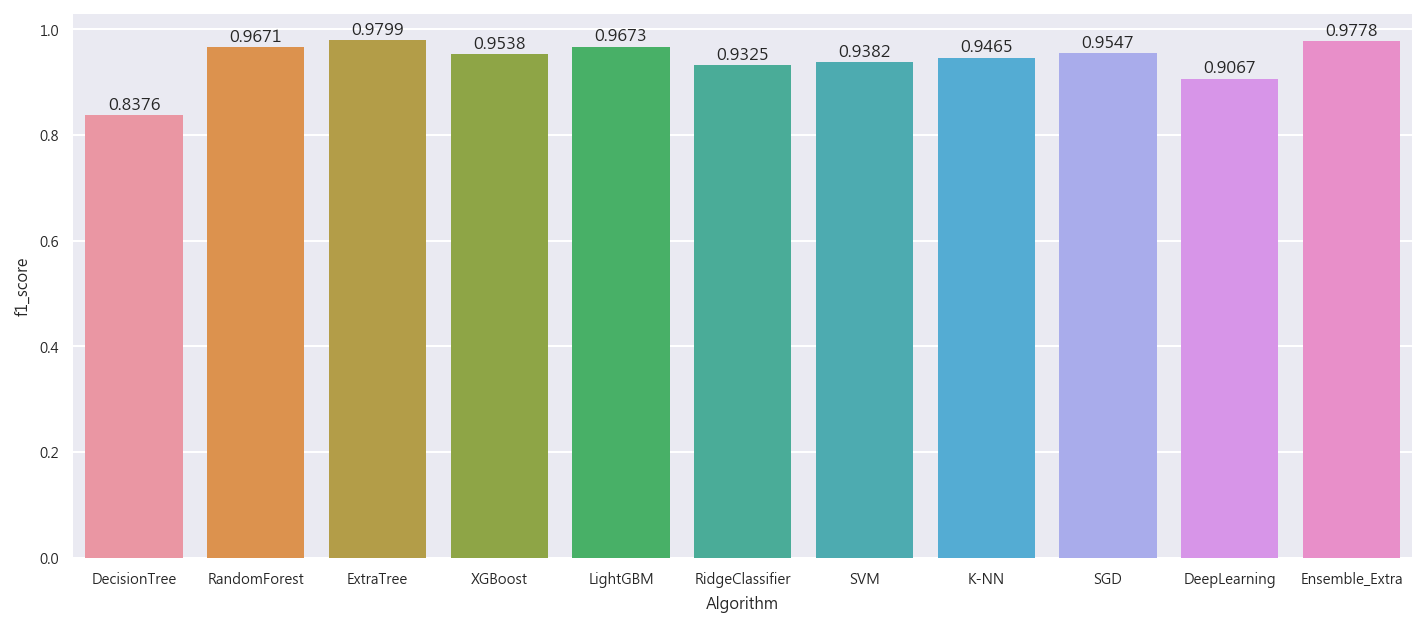

In [72]:
'模型簡單比較'
plt.rcParams['figure.figsize'] = (12,5)
print("各模型的訓練 ROC_AUC : " if NoClasses==2 else '各模型的訓練 正確率 : ')
algobarplot = sns.barplot(x = 'Algorithm',y = 'ROC_AUC' if NoClasses==2 else 'f1_score',data = TrainReport)

for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals = 4), (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

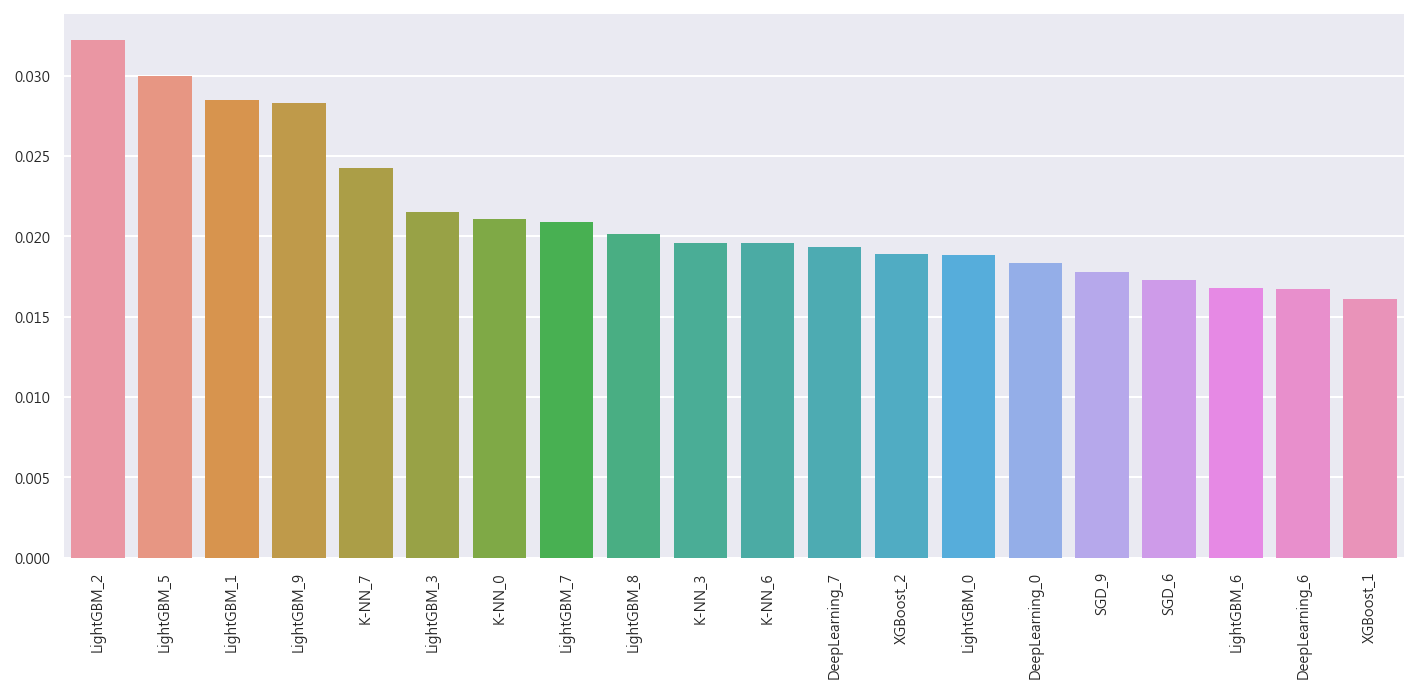

In [73]:
if hasattr(clf, 'feature_importances_'):
    col_size = len(TrainX_Ensemble.columns) if TrainX_Ensemble.columns.size < 20 else 20
    important_columns = [x for _,x in sorted(zip(clf.feature_importances_,TrainX_Ensemble.columns),reverse = True)]
    sns.set(font_scale = 0.7,font = "Microsoft JhengHei")
    barplot = sns.barplot(x = important_columns[:col_size], y = sorted(clf.feature_importances_,reverse = True)[:col_size],order = important_columns[:col_size])
    barplot.set_xticklabels(barplot.get_xticklabels(), rotation = 90);

如果 Test 資料有 Truth 值，以下呈現各模型在測試時，驗證的準確度比較圖

各模型的測試 正確率 : 


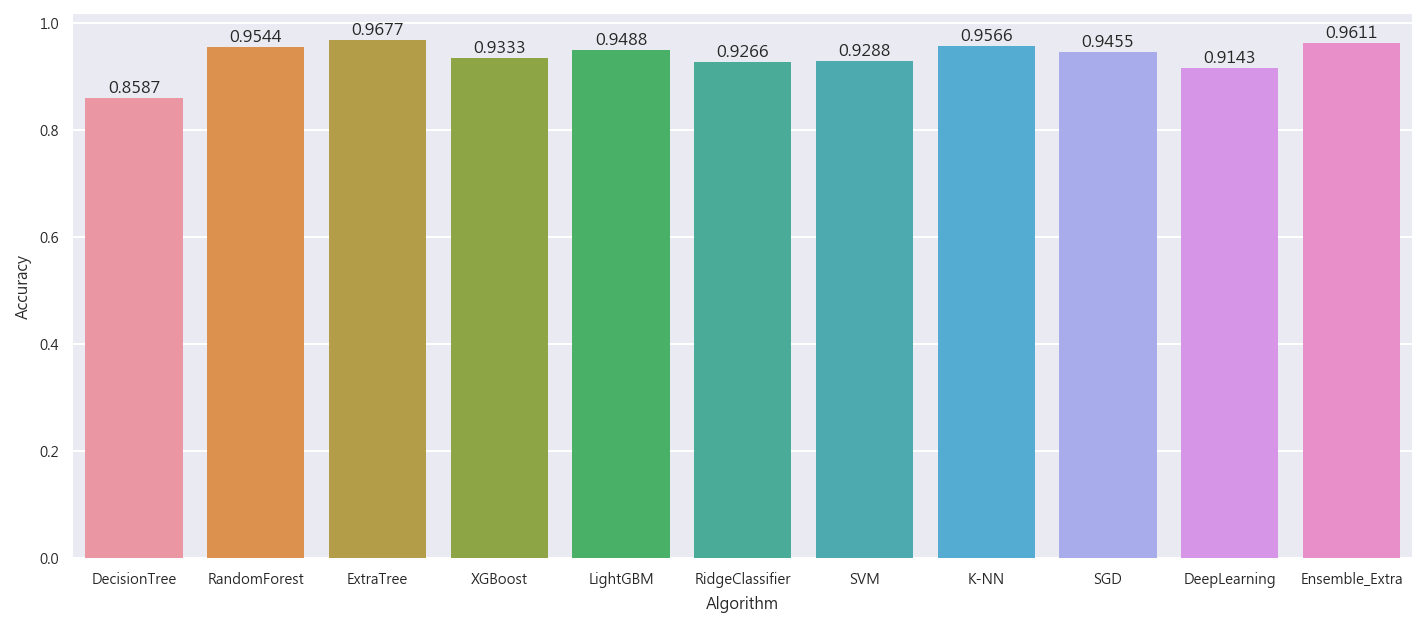

In [74]:
'模型簡單比較'
if TestY is not None:
    plt.rcParams['figure.figsize'] = (12,5)
    print("各模型的測試 ROC_AUC : " if NoClasses==2 else '各模型的測試 正確率 : ')
    algobarplot = sns.barplot(x = 'Algorithm',y = 'ROC_AUC' if NoClasses==2 else "Accuracy",data = TestReport)
    for p in algobarplot.patches: algobarplot.annotate(np.round(p.get_height(),decimals = 4), (p.get_x()+p.get_width()/2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [75]:
import warnings
warnings.filterwarnings("ignore",category = RuntimeWarning)
def magnify():
    return [dict(selector = "th",props = [("font-size", "11pt")]),
            dict(selector = "td",props = [('padding', ".4em .4em"),("font-size", "13pt"),('min-width', '105px')])]
TrainReport.reset_index(inplace = True,drop = True)
dropcol= ['ROC_AUC','confusion_matrix'] if NoClasses > 2 else ['confusion_matrix']
TrainReport.drop(dropcol,axis = 1).style.set_precision(5).set_table_styles(magnify()).background_gradient(cmap = 'viridis', low = .9, high = 0).highlight_null('Gainsboro')    


,Algorithm,Accuracy,Precision,Recall,f1_score,Cohen's kappa,JaccardSim,HammingLoss
0,DecisionTree,0.84058,0.83996,0.84058,0.83763,0.82278,0.84058,-0.15942
1,RandomForest,0.96767,0.96796,0.96767,0.96713,0.96406,0.96767,-0.03233
2,ExtraTree,0.97993,0.97999,0.97993,0.97991,0.9777,0.97993,-0.020067
3,XGBoost,0.95429,0.95532,0.95429,0.95376,0.94919,0.95429,-0.045708
4,LightGBM,0.96767,0.96875,0.96767,0.96729,0.96406,0.96767,-0.03233
5,RidgeClassifier,0.93311,0.9344,0.93311,0.93245,0.92563,0.93311,-0.06689
6,SVM,0.93868,0.93947,0.93868,0.93816,0.93183,0.93868,-0.061315
7,K-NN,0.9476,0.94841,0.9476,0.94648,0.94175,0.9476,-0.052397
8,SGD,0.95541,0.95586,0.95541,0.95473,0.95043,0.95541,-0.044593
9,DeepLearning,0.91193,0.91725,0.91193,0.90668,0.90206,0.91193,-0.088071


以下呈現預測結果的檔案，會包含各模型預測結果、各模型預測各個分類的機率或函數(Ridge)

In [76]:
# from os import startfile
# startfile(OutputAnswerCSV)
from IPython.display import FileLink, FileLinks
FileLink('./'+OutputAnswerCSV)#lists all downloadable files on server

/home/i9e00411/Ensemble2.0-EAOD/Classification/finaldata.csv

↑請點擊以上連結進行結果檔下載